In [1]:
# Import 3rd party libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Import local Libraries
sys.path.insert(0, os.path.dirname(os.getcwd()))
#from features.feature_extractor import Features
from utils.plotting.waveforms import plot_waveforms

# Configure Notebook
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Sampling frequency (Hz)
fs = 300  

# Data paths
label_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'labels')
waveform_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'waveforms')
#feature_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'features')

In [3]:
# Read labels CSV
labels = pd.read_csv(os.path.join(label_path, 'labels.csv'), names=['file_name', 'label'])

# View DataFrame
print(labels.head(5))
print(labels['file_name'][0])

  file_name label
0    A00001     N
1    A00002     N
2    A00003     N
3    A00004     A
4    A00005     A
A00001


In [4]:
labels_copy=labels
print(labels_copy)
file_list=[]
for i in range(len(labels_copy['label'])):
    if (labels_copy['label'][i] == 'N') :
        labels_copy['label'][i] = 0
    elif (labels_copy['label'][i] == 'A') :
        labels_copy['label'][i] = 1
    elif (labels_copy['label'][i] == '~') :
        labels_copy['label'][i] = 2

    if (labels_copy['label'][i] == 2) or (labels_copy['label'][i] == 1) or (labels_copy['label'][i] == 0):
        file_list.append(labels['file_name'][i])
    else:
        file = labels['file_name'][i]
        labels_copy=labels_copy.drop(labels[labels.file_name==file].index)
print(file_list)
print(labels_copy)

     file_name label
0       A00001     N
1       A00002     N
2       A00003     N
3       A00004     A
4       A00005     A
5       A00006     N
6       A00007     N
7       A00008     O
8       A00009     A
9       A00010     N
10      A00011     N
11      A00012     N
12      A00013     O
13      A00014     N
14      A00015     A
15      A00016     N
16      A00017     O
17      A00018     N
18      A00019     N
19      A00020     O
20      A00021     N
21      A00022     ~
22      A00023     O
23      A00024     O
24      A00025     N
25      A00026     N
26      A00027     A
27      A00028     N
28      A00029     O
29      A00030     O
...        ...   ...
8498    A08499     O
8499    A08500     A
8500    A08501     O
8501    A08502     N
8502    A08503     N
8503    A08504     O
8504    A08505     N
8505    A08506     N
8506    A08507     N
8507    A08508     N
8508    A08509     N
8509    A08510     O
8510    A08511     O
8511    A08512     N
8512    A08513     N
8513    A0851

In [ ]:
import scipy.io as sio
from biosppy.signals import ecg
from biosppy.signals.tools import filter_signal
from scipy.signal import butter, lfilter
import time

file_names = [file.split('.')[0] for file in os.listdir(waveform_path) if file.endswith('.mat')]
label2 = labels_copy

rows_list = []
input_data= pd.DataFrame()

current_milli_time = lambda: int(round(time.time() * 1000))
print(current_milli_time())

def butter_bandpass(lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

for file in file_list:
    signal = sio.loadmat(os.path.join(waveform_path, file))['val'][0].astype('float')
    signal = butter_bandpass_filter(signal,40,120,300)
    # Get BioSPPy ECG object
    ecg_object = ecg.hamilton_segmenter(signal=signal, sampling_rate=300)
    # Get BioSPPy output
    #ts = ecg_object['ts']          # Signal time array
    rpeaks = ecg_object['rpeaks']  # rpeak indices
    #hr = ecg_object['heart_rate']  # HR
   
    #if((len(ts)/300)==30):
    print(file)
    try :
        basic_features =[]
        rows_list.append(signal)
        print(rpeaks)
        for i in range(len(rpeaks)-1):
            basic_features.append(rpeaks[i+1]-rpeaks[i])
        feat = pd.DataFrame([basic_features])
        input_data=input_data.append([feat],ignore_index=False)
        print(feat.head())
    except Exception as e:
        print('problem', file, e)
        
print(current_milli_time)

print(input_data.head(20))

1581546119977
A00001
[ 139  342  570  797 1041 1281 1511 1755 1996 2240 2480 2714 2952 3189
 3433 3680 3915 4140 4371 4599 4827 5045 5260 5485 5712 5943 6165 6386
 6608 6828 7040 7259 7482 7698 7909 8128 8356 8587 8811]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  203  228  227  244  240  230  244  241  244  240 ...   220  212  219  223   

    32   33   34   35   36   37  
0  216  211  219  228  231  224  

[1 rows x 38 columns]
A00002
[ 164  470  771 1077 1394 1700 2015 2336 2644 2753 2965 3289 3597 3907
 4220 4523 4819 5120 5371 5475 5559 5640 5784 5860 5950 6242 6531 6818
 7115 7432 7531 7694 7991 8287 8572 8860]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  306  301  306  317  306  315  321  308  109  212 ...   289  287  297  317   

   29   30   31   32   33   34  
0  99  163  297  296  285  288  

[1 rows x 35 columns]
A00003
[   47   279   512   744   968  1212  1449  1675  1889  2101  2317  2541
  2764 

    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  304  308  308  308  306  309  311  306  309  312 ...   308  310  313  311   

    22   23   24   25   26   27  
0  309  311  314  311  310  314  

[1 rows x 28 columns]
A00027
[ 252  465  653  806  995 1196 1349 1533 1740 1892 2160 2355 2558 2710
 2896 3102 3252 3444 3649 3799 4069 4336 4533 4738 4896 5086 5284 5435
 5621 5830 5982 6172 6375 6528 6792 7063 7333 7529 7736 7891 8155 8369
 8555 8717 8917]
    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  213  188  153  189  201  153  184  207  152  268 ...   271  270  196  207   

    38   39   40   41   42   43  
0  155  264  214  186  162  200  

[1 rows x 44 columns]
A00028
[   94   364   641   922  1205  1488  1769  2052  2340  2622  2906  3193
  3477  3758  4042  4328  4609  4891  5174  5456  5734  6015  6297  6576
  6856  7138  7421  7702  7983  8267  8550  8829  9112  9398  9677  9956
 10240 10522 10804 11088 11375 11

A00052
[ 236  501  785 1081 1349 1625 1902 2171 2415 2670 2933 3178 3428 3691
 3964 4301 4548 4675 4785 4959 5205 5423 5676 5920 6144 6401]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  265  284  296  268  276  277  269  244  255  263 ...   247  127  110  174   

    19   20   21   22   23   24  
0  246  218  253  244  224  257  

[1 rows x 25 columns]
A00053
[ 326  663  956 1225 1525 1836 2168 2499 2763 3109 3258 3316 3463 3826
 4018 4160 4523 4863 5226 5573 5820 5929 6263 6626 6971 7336 7681 8047
 8384 8692]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  337  293  269  300  311  332  331  264  346  149 ...   247  109  334  363   

    23   24   25   26   27   28  
0  345  365  345  366  337  308  

[1 rows x 29 columns]
A00054
[ 120  244  335  431  751  945 1123 1246 1511 1737 1984 2295 2496 2945
 3298 3529 3805 4059 4255 4476 4809 5011 5302 5509 5719 5999 6205 6484
 6753 6991 7314 7520 7728 7966 8161 8394 8640 

A00080
[  55  241  427  617  808  998 1181 1365 1553 1744 1938 2131 2329 2534
 2741 2947 3148 3350 3557 3768 3974 4174 4372 4572 4775 4978 5181 5379
 5585 5794 6002 6208 6408 6609 6813 7021 7227 7427 7625 7825 8029 8234
 8440 8642 8837]
    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  186  186  190  191  190  183  184  188  191  194 ...   208  206  200  198   

    38   39   40   41   42   43  
0  200  204  205  206  202  195  

[1 rows x 44 columns]
A00081
[  196   433   680   938  1179  1425  1673  1920  2167  2415  2670  2916
  3170  3407  3654  3902  4149  4405  4663  4924  5150  5396  5642  5889
  6144  6397  6642  6883  7130  7377  7625  7879  8139  8371  8618  8866
  9113  9361  9608  9855 10102 10357 10597 10844 11091 11338 11584 11851
 12116 12369 12598 12838 13086 13335 13589 13841 14082 14332 14589 14835
 15080 15328 15580 15836 16077 16324 16578 16833 17073 17320 17569 17828]
    0    1    2    3    4    5    6    7    8    9  ...    61   6

A00106
[ 130  411  600  876  975 1234 1509 1775 2034 2315 2580 2853 3128 3411
 3675 3946 4213 4479 4746 5017]
    0    1    2   3    4    5    6    7    8    9    10   11   12   13   14  \
0  281  189  276  99  259  275  266  259  281  265  273  275  283  264  271   

    15   16   17   18  
0  267  266  267  271  
A00107
[  79  169  260  351  442  533  621  718  819  902  998 1095 1188 1280
 1358 1460 1551 1630 1836 1917 2010 2111 2194 2288 2383 2481 2569 2657
 2748 2837 2928 3019 3111 3201 3292 3382 3473 3563 3650 3746 3852 3933
 4029 4123 4213 4306 4400 4497 4922 5030 5135 5225 5411 5500 5591 5680
 5772 5862 5954 6040 6137 6227 6318 6421 6505 6595 6685 6777 6867 6956
 7049 7147 7232 7325 7424 7507 7600 7697 7782 7875 7969 8066 8154 8333
 8423 8509 8603 8704 8786 8884 8979]
   0   1   2   3   4   5   6    7   8   9  ...  80  81   82  83  84  85   86  \
0  90  91  91  91  91  88  97  101  83  96 ...  97  88  179  90  86  94  101   

   87  88  89  
0  82  98  95  

[1 rows x 90 column

     0    1    2    3    4    5    6    7    8    9
0  280  296  303  291  292  299  303  309  606  301
A00140
[  37  316  596  877 1159 1441 1719 1999 2278 2551 2826 3100 3374 3646
 3917 4191 4457 4723 4990 5253 5518 5785 6049 6312 6576 6839 7095 7352
 7611 7868 8120 8374 8630 8885]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  279  280  281  282  282  278  280  279  273  275 ...   264  263  256  257   

    27   28   29   30   31   32  
0  259  257  252  254  256  255  

[1 rows x 33 columns]
A00141
[ 101  326  513  710  963 1215 1469 1721 1975 2226 2480 2727 2954 3193
 3407 3651 3878 4105 4317 4515 4690 4898]
    0    1    2    3    4    5    6    7    8    9  ...    11   12   13   14  \
0  225  187  197  253  252  254  252  254  251  254 ...   227  239  214  244   

    15   16   17   18   19   20  
0  227  227  212  198  175  208  

[1 rows x 21 columns]
A00142
[  68  378  667  960 1258 1559 1856 2157 2459 2761 3055 3356 3660 3954
 4242 4539 48

A00164
[   53   168   323   444   513   620   795   870  1058  1324  1515  1724
  1877  2168  2265  2398  2667  2921  3177  3434  3711  3964  4211  4355
  4668  4864  5056  5253  5460  5667  5928  6186  6441  6718  6957  7219
  7491  7762  7814  7950  8116  8303  8461  8628  8835  9051  9154  9200
  9473  9531  9719  9965 10045 10233 10529 10847 11043 11280 11899 12029
 12338 12743 12830 13139 13213 13474 13522 13729 13821 13916 14141 14308
 14532 14770 15075 15212 15570 15660 15813 16061 16362 16457 16540 16614
 16864 17114 17264 17344 17584 17793]
    0    1    2   3    4    5   6    7    8    9  ...    79  80  81  82   83  \
0  115  155  121  69  107  175  75  188  266  191 ...   301  95  83  74  250   

    84   85  86   87   88  
0  250  150  80  240  209  

[1 rows x 89 columns]
A00165
[ 272  523  763 1005 1246 1487 1731 2010 2310 2621 2900 3156 3406 3648
 3891 4135 4381 4662 4946 5207 5466 5791 6046 6297 6543 6785 7026 7269
 7513 7802 8083 8345 8604 8947]
    0    1    2    3   

[1 rows x 44 columns]
A00188
[ 148  370  590  808 1024 1243 1464 1688 1916 2147 2382 2618 2854 3086
 3317 3545 3770 3991 4213 4434 4656 4881 5112 5345 5579 5815 6049 6281
 6514 6742 6969 7197 7423 7648 7873 8100 8328 8566 8808]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  222  220  218  216  219  221  224  228  231  235 ...   228  227  228  226   

    32   33   34   35   36   37  
0  225  225  227  228  238  242  

[1 rows x 38 columns]
A00190
[  10  544  826 1127 1443 1748 2039 2340 2626 2924 3203 3490 3783 4100
 4387 4684 4967 5258 5547 5828 6132 6406 6698 6996 7256 7541 7812 8094
 8375 8657 8949]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  534  282  301  316  305  291  301  286  298  279 ...   274  292  298  260   

    24   25   26   27   28   29  
0  285  271  282  281  282  292  

[1 rows x 30 columns]
A00191
[  95  391  489  644  918 1170 1405 1687 1965 2049 2234 2482 2744 3040
 3292 3573 3854 4127 437

A00219
[ 140  345  537  677  907 1022 1105 1289 1362 1469 1641 1901 2098 2292
 2492 2693 2906 3126 3350 3578 3801 4019 4253 4501 4788 5071 5332 5589
 5869 6153 6423 6679 6946 7221 7491 7734 7976 8220 8476 8732 8980]
    0    1    2    3    4   5    6   7    8    9  ...    30   31   32   33  \
0  205  192  140  230  115  83  184  73  107  172 ...   256  267  275  270   

    34   35   36   37   38   39  
0  243  242  244  256  256  248  

[1 rows x 40 columns]
A00221
[ 200  493  740  988 1208 1452 1706 1956 2189 2427 2647 2854 3053 3259]
    0    1    2    3    4    5    6    7    8    9    10   11   12
0  293  247  248  220  244  254  250  233  238  220  207  199  206
A00222
[ 299  588  881 1192 1508 1811 2123 2418 2611 2714 3019 3318 3612 3903
 4210 4524 4827 5122 5407 5694 5982 6274 6552 6822 7099 7352 7597 7839
 8115 8416 8738]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  289  293  311  316  303  312  295  193  103  305 ...   292  278  270  277 

    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  224  215  190  183  198  226  213  209  224  230 ...   211  204  213  208   

    19   20   21   22   23   24  
0  197  195  190  171  178  186  

[1 rows x 25 columns]
A00240
[ 151  355  559  762  966 1167 1369 1572 1783 1977 2187 2382 2584 2784
 2983 3184 3390 3587 3781 3967 4162 4368 4557 4756 4957 5165 5364 5562
 5671 5754 5834 5956 6161 6372 6572 6774 6975 7179 7377 7593 7798 7995
 8066 8201 8407 8619 8813]
    0    1    2    3    4    5    6    7    8    9  ...    36   37   38   39  \
0  204  204  203  204  201  202  203  211  194  210 ...   204  198  216  205   

    40  41   42   43   44   45  
0  197  71  135  206  212  194  

[1 rows x 46 columns]
A00241
[  162   423   679   938  1195  1473  1743  2013  2283  2546  2806  3086
  3359  3629  3888  4164  4434  4698  4960  5227  5491  5770  6035  6305
  6579  6856  7124  7393  7661  7922  8174  8427  8676  8943  9200  9454
  9719  9991 10260 10532 

A00265
[ 115  407  703  980 1248 1422 1492 1790 2063 2343 2630 2923 3200 3479
 3737 3997 4272 4546 4857 5083 5353 5624 5892 6156 6422 6693 6969 7244
 7516 7790 8066 8343 8613 8881]
    0    1    2    3    4   5    6    7    8    9  ...    23   24   25   26  \
0  292  296  277  268  174  70  298  273  280  287 ...   266  271  276  275   

    27   28   29   30   31   32  
0  272  274  276  277  270  268  

[1 rows x 33 columns]
A00266
[  81  347  626  916 1216 1516 1808 2111 2422 2732 3040 3338 3636 3950
 4274 4591 4900 5216 5541 5865 6172 6489 6813 7143 7462 7750 8038 8323
 8606 8878]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  266  279  290  300  300  292  303  311  310  308 ...   307  317  324  330   

    23   24   25   26   27   28  
0  319  288  288  285  283  272  

[1 rows x 29 columns]
A00267
[ 219  343  532  668  943 1115 1253 1455 1672 1884 2048 2211 2385 2562
 2766 2942 3145 3321 3488 3643 3873 4035 4182 4418 4648 4774 4975 5173
 5368 5

[1 rows x 35 columns]
A00290
[  52  335  622  923 1192 1476 1760 2044 2325 2607 2890 3188 3454 3736
 4019 4318 4586 4870 5154 5438 5720 6001 6282 6563 6843 7122 7402 7682
 7977 8256 8409 8521 8802]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  283  287  301  269  284  284  284  281  282  283 ...   281  280  279  280   

    26   27   28   29   30   31  
0  280  295  279  153  112  281  

[1 rows x 32 columns]
A00292
[ 182  439  693  935 1176 1413 1660 1909 2133 2363 2600 2833 3067 3278
 3492 3699]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14
0  257  254  242  241  237  247  249  224  230  237  233  234  211  214  207
A00294
[ 170  489  750 1126 1455 1779 2101 2420 2734 2985 3354 3670 3984 4289
 4568 4796 5167 5485 5804 6125 6447 6769 7054 7399 7717 8032 8283 8656
 8969]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  319  261  376  329  324  322  319  314  251  369 ...   321  322  32

A00319
[  51  306  584  855 1115 1370 1633 1902 2139 2381 2642 2891 3129 3386
 3654 3887 4130 4379 4630 4878 5122 5353 5591 5852 6107 6351 6606 6729
 6854 7097 7330 7559 7792 8004 8213 8421 8629 8846]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  255  278  271  260  255  263  269  237  242  261 ...   125  243  233  229   

    31   32   33   34   35   36  
0  233  212  209  208  208  217  

[1 rows x 37 columns]
A00320
[ 108  351  589  821 1057 1297 1541 1789 2034 2270 2507 2751 3001 3254
 3513 3771 4021 4257 4485 4708 4934 5171 5419 5687 5970 6250 6506 6763
 7021 7273 7517 7753 7986 8215 8439 8660 8887]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  243  238  232  236  240  244  248  245  236  237 ...   257  258  252  244   

    30   31   32   33   34   35  
0  236  233  229  224  221  227  

[1 rows x 36 columns]
A00321
[ 160  320  491  640  782  957 1108 1294 1451 1634 1784 1942 2100 2231
 2393 2535 2722 2878 

[1 rows x 34 columns]
A00352
[  12  290  582  867 1131 1374 1602 1830 2072 2325 2583 2852 3125 3400
 3664 3921 4178 4445 4731 5001 5265 5533 5803 6080 6365 6644 6911 7175
 7458 7757 8063 8369 8661 8946]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  278  292  285  264  243  228  228  242  253  258 ...   285  279  267  264   

    27   28   29   30   31   32  
0  283  299  306  306  292  285  

[1 rows x 33 columns]
A00354
[ 145  406  687  970 1246 1539 1849 2126 2426 2741 2997 3288 3593 3853
 4134 4434 4696 4986 5268 5538 5828 6141 6403 6693 7004 7264 7544 7843
 8170 8446 8730]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  261  281  283  276  293  310  277  300  315  256 ...   313  262  290  311   

    24   25   26   27   28   29  
0  260  280  299  327  276  284  

[1 rows x 30 columns]
A00355
[    5   267   491   580   719   955  1201  1461  1728  1982  2221  2461
  2702  2950  3208  3470  3729  3976  4223  444

[1 rows x 39 columns]
A00372
[  41  138  324  526  738  945 1149 1358 1565 1778 1996 2208 2423 2628
 2831 3023 3225 3419 3616 3815 4008 4215 4398 4592 4767 4957 5124 5297
 5470 5648]
   0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  97  186  202  212  207  204  209  207  213  218 ...   193  207  183  194   

    23   24   25   26   27   28  
0  175  190  167  173  173  178  

[1 rows x 29 columns]
A00374
[  99  206  323  587  818 1037 1274 1520 1749 1982 2238 2501 2746 2985
 3233 3493 3745 3974 4220 4463 4683 4897 5120 5346 5579 5784 5987 6190
 6398 6623 6838 7057 7261 7466 7663 7853 8042 8233 8422 8606 8788 8971]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  107  117  264  231  219  237  246  229  233  256 ...   204  205  197  190   

    35   36   37   38   39   40  
0  189  191  189  184  182  183  

[1 rows x 41 columns]
A00375
[ 269  488  651  831 1048 1212 1394 1612 1774 1957 2176 2337 2531 2743
 2909 3062 3226 

A00401
[  75  330  594  856 1122 1384 1646 1906 2164 2417 2668 2917 3161 3395
 3621 3845 4078 4315 4551 4785 5022 5258 5496 5729 5961 6202 6451 6709
 6870 6972 7229 7482 7739 7992 8240 8475 8704 8936]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  255  264  262  266  262  262  260  258  253  251 ...   161  102  257  253   

    31   32   33   34   35   36  
0  257  253  248  235  229  232  

[1 rows x 37 columns]
A00403
[ 214  245  517  736  977 1205 1441 1684 1923 2160 2415 2670 2928 3187
 3446 3706 3968 4247 4514 4793 5071 5327 5582 5842 6104 6388 6654 6905
 7156 7311 7419 7490 7681 7692 7940 8177 8424 8677 8911]
   0    1    2    3    4    5    6    7    8    9  ...    28   29  30   31  \
0  31  272  219  241  228  236  243  239  237  255 ...   155  108  71  191   

   32   33   34   35   36   37  
0  11  248  237  247  253  234  

[1 rows x 38 columns]
A00404
[ 189  436  702  979 1246 1523 1690 2075 2349 2624 2904 3184 3338 3499
 3737 4003 4147 4

A00429
[ 193  391  598  787  984 1178 1367 1563 1756 1952 2152 2355 2561 2767
 2972 3174 3372 3565 3750 3937 4160 4306 4490 4677 4868 5075 5279 5491
 5711 5929 6145 6355 6562 6764 6965]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  198  207  189  197  194  189  196  193  196  200 ...   207  204  212  220   

    28   29   30   31   32   33  
0  218  216  210  207  202  201  

[1 rows x 34 columns]
A00432
[  41  283  442  612  765  884 1060 1177 1297 1437 1558 1710 1865 2083
 2211 2419 2608 2768 2908 3025 3182 3373 3621 3796 4004 4190 4307 4486
 4671 4783 4906 5066 5185 5336 5482 5628 5746 5900 6156 6312 6556 6682
 6819 6994 7130 7271 7387 7589 7759 7872 7989 8131 8336 8533 8675 8831
 8970]
    0    1    2    3    4    5    6    7    8    9  ...    46   47   48   49  \
0  242  159  170  153  119  176  117  120  140  121 ...   202  170  113  117   

    50   51   52   53   54   55  
0  142  205  197  142  156  139  

[1 rows x 56 columns]
A00433
[ 262

A00457
[ 225  465  697  946 1178 1421 1658 1888 2137 2369 2612 2852 3100 3344
 3585 3822 4062 4307 4560 4808 5057 5320 5569 5848 6113 6366 6639 6900
 7152 7426 7686 7943 8205 8473 8729]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  240  232  249  232  243  237  230  249  232  243 ...   253  273  261  252   

    28   29   30   31   32   33  
0  274  260  257  262  268  256  

[1 rows x 34 columns]
A00458
[ 196  549  852 1184 1515 1849 2178 2505 2831 3140 3434 3727 4039 4356
 4444 4660 4759 4869 4948 5065 5177 5257 5355 5467 5564 5694 5888 6203
 6427 6524 6849 6936 7162 7477 7796 8011 8105 8422 8744]
    0    1    2    3    4    5    6    7    8    9  ...   28   29  30   31  \
0  353  303  332  331  334  329  327  326  309  294 ...   97  325  87  226   

    32   33   34  35   36   37  
0  315  319  215  94  317  322  

[1 rows x 38 columns]
A00459
[ 196  445  691  937 1182 1429 1676 1918 2158 2397 2636 2876 3116 3354
 3593 3834 4073 4309 4538 4762 4

A00483
[  42  294  543  782 1013 1245 1487 1726 1964 2210 2458 2692 2944 3195
 3437 3688 3935 4184 4439 4696 4950 5193 5449 5710 5974 6218 6474 6728
 6985 7244 7506 7770 8012 8263 8519 8780]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  252  249  239  231  232  242  239  238  246  248 ...   256  254  257  259   

    29   30   31   32   33   34  
0  262  264  242  251  256  261  

[1 rows x 35 columns]
A00486
[ 354  504  665  835 1002 1248 1421 1733 2023 2522 2679 2848 3022 3379
 3662 3851 4083 4266 4509 4830 5132 5236 5521 5821 6005 6424 6642 6899
 7081 7262 7436 7629 7979 8295 8385 8722]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  150  161  170  167  246  173  312  290  499  157 ...   218  257  182  181   

    29   30   31   32  33   34  
0  174  193  350  316  90  337  

[1 rows x 35 columns]
A00487
[  190   459   746  1020  1297  1563  1842  2108  2363  2631  2885  3129
  3389  3642  3894  4140  4393  4645

A00508
[ 105  418  697  849 1004 1294 1428 1593 1705 1894 2194 2501 2794 3098
 3403 3709 4019 4329 4642 4953 5264 5574 5882 6075 6193 6503 6810 7118
 7420 7743 8036 8338 8541 8643 8945]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  313  279  152  155  290  134  165  112  189  300 ...   310  307  308  302   

    28   29   30   31   32   33  
0  323  293  302  203  102  302  

[1 rows x 34 columns]
A00509
[ 230  418  646  888 1089 1311 1549 1762 1972 2211 2441 2638 2869 3082
 3292 3539 3783 4026 4282 4528 4729 4946 5186 5443 5686 5933 6163 6356
 6602 6851 7053 7271 7512 7765 8012 8235 8435 8672 8929]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  188  228  242  201  222  238  213  210  239  230 ...   249  202  218  241   

    32   33   34   35   36   37  
0  253  247  223  200  237  257  

[1 rows x 38 columns]
A00510
[ 146  347  551  750  953 1145 1350 1544 1754 1945 2141 2345 2545 2742
 2941 3137 3315 3502 3682 

A00534
[  127   209   273   333   549   754  1000  1178  1406  1620  1843  2053
  2281  2506  2745  2973  3207  3449  3689  3896  4113  4329  4548  4773
  4995  5205  5429  5644  5857  6077  6291  6505  6720  6936  7154  7356
  7570  7784  7996  8212  8430  8629  8839  9052  9273  9487  9692  9905
 10111 10311 10522 10736 10960 11165 11373 11591 11804 12016 12221 12426
 12633 12839 13054 13268 13496 13727 13960 14191 14412 14630 14851 15074
 15298 15526 15755 15972 16194 16420 16653 16872 17096 17316 17554 17785]
   0   1   2    3    4    5    6    7    8    9  ...    73   74   75   76  \
0  82  64  60  216  205  246  178  228  214  223 ...   229  217  222  226   

    77   78   79   80   81   82  
0  233  219  224  220  238  231  

[1 rows x 83 columns]
A00537
[ 208  508  771  846 1030 1332 1478 1696 1721 1910 2011 2250 2337 2504
 2770 2919 3011 3141 3185 3338 3466 3687 3969 4204 4492 4780 5059 5353
 5642 5923 6208 6493 6593 6771 6896 7041 7156 7347 7624 7909 8196 8484
 8769]
    0   

A00567
[ 214  400  699  905 1216 1730 1964 2313 2539 2773 2921 3183 3414 3674
 3954 4165 4432 4750 5017 5266 5535 5811 6076 6320 6605 6862 7259 7559
 7804 8049 8534 8811]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  186  299  206  311  514  234  349  226  234  148 ...   265  244  285  257   

    25   26   27   28   29   30  
0  397  300  245  245  485  277  

[1 rows x 31 columns]
A00568
[   5  197  445  717  975 1248 1513 1779 2043 2302 2555 2801 3063 3318
 3575 3831 4087 4342 4600 4857 5117 5364 5618 5878 6132 6396 6660 6919
 7175 7420 7661 7902 8150 8407 8669 8925]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  192  248  272  258  273  265  266  264  259  253 ...   264  259  256  245   

    29   30   31   32   33   34  
0  241  241  248  257  262  256  

[1 rows x 35 columns]
A00569
[  35  269  523  770 1014 1266 1524 1760 2003 2250 2362 2494 2734 2978
 3226 3470 3716 3966 4213 4462 4715 4966 5217 5475 5726 

    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  115  124  108  112  197  115  125  125  104  122 ...   111  147  403  296   

    21   22   23   24   25   26  
0  305  282  298  288  275  290  

[1 rows x 27 columns]
A00592
[ 132  249  373  601  760  946 1090 1220 1374 1532 1688 1844 1965 2153
 2287 2420 2554 2721 2868]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  117  124  228  159  186  144  130  154  158  156  156  121  188  134  133   

    15   16   17  
0  134  167  147  
A00594
[   5  199  430  671  913 1156 1397 1638 1876 2113 2354 2598 2849 3109
 3383 3657 3932 4204 4464 4720 4979 5234 5485 5737 5993 6250 6502 6751
 6996 7244 7493 7748 8012 8279 8540 8805]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  194  231  241  242  243  241  241  238  237  241 ...   252  249  245  248   

    29   30   31   32   33   34  
0  249  255  264  267  261  265  

[1 rows x 35 columns]
A

A00618
[  10  236  457  667  871 1077 1292 1531 1790 2054 2314 2569 2818 3058
 3290 3513 3732 3951 4166 4379 4593 4803 5008 5213 5425 5652 5897 6151
 6406 6653 6891 7126 7354 7575]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  226  221  210  204  206  215  239  259  264  260 ...   212  227  245  254   

    27   28   29   30   31   32  
0  255  247  238  235  228  221  

[1 rows x 33 columns]
A00619
[  42  341  591  840 1088 1347 1582 1817 2053 2290 2551 2789 3032 3267
 3502 3732 3957 4169 4314 4381 4605 4830 5082 5345 5603 5874 6106]
    0    1    2    3    4    5    6    7    8    9  ...    16   17  18   19  \
0  299  250  249  248  259  235  235  236  237  261 ...   212  145  67  224   

    20   21   22   23   24   25  
0  225  252  263  258  271  232  

[1 rows x 26 columns]
A00620
[ 282  565  844 1114 1400 1695 1985 2146 2519 2778 3022 3266 3518 3783]
    0    1    2    3    4    5    6    7    8    9    10   11   12
0  283  279  270  286  295

A00643
[    5   158   279   401   518   630   748   867   978  1195  1339  1479
  1596  1703  1844  2015  2170  2280  2383  2490  2655  2768  2882  3042
  3193  3446  3641  3753  3862  4018  4158  4276  4390  4484  4608  4805
  4934  5062  5169  5320  5531  5654  5779  5939  6070  6188  6293  6415
  6547  6727  6985  7140  7247  7399  7577  7712  7834  8009  8129  8250
  8360  8482  8642  8750  8918  9042  9160  9339  9461  9589  9763  9879
 10031 10221 10494 10614 10724 10863 11025 11157 11239 11345 11528 11662
 11877 12104 12273 12416 12682 12850 13051 13215 13365 13532 13702 13836
 13951 14082 14250 14384 14541 14671 14798 14976 15091 15214 15326 15501
 15653 15765 15906 16018 16130 16251 16365 16539 16652 16774 16962 17088
 17205 17290 17434 17551 17696 17822 17936]
   0    1    2    3    4    5    6    7    8    9   ...   116  117  118  119  \
0  153  121  122  117  112  118  119  111  217  144 ...   122  188  126  117   

   120  121  122  123  124  125  
0   85  144  117  145  1

A00668
[   78   367   681   981  1204  1615  1942  2256  2582  2921  3251  3603
  3946  4289  4624  4972  5303  5642  5986  6311  6647  6980  7314  7650
  7991  8315  8650  8991  9324  9651  9994 10321 10660 10999 11335 11675
 12020 12346 12686 13025 13372 13707 14055 14386 14730 15068 15405 15749
 16097 16430 16774 17123 17460 17802]
    0    1    2    3    4    5    6    7    8    9  ...    43   44   45   46  \
0  289  314  300  223  411  327  314  326  339  330 ...   344  338  337  344   

    47   48   49   50   51   52  
0  348  333  344  349  337  342  

[1 rows x 53 columns]
A00669
[  44  189  488  832  944 1006 1087 1215 1291 1394 1536 1696 2006 2312
 2621 2924 3226 3529 3830 4128 4424 4720 5019 5306 5596 5871 6141 6400
 6671 6960 7252 7550 7851 8146 8428 8727]
    0    1    2    3   4   5    6   7    8    9  ...    25   26   27   28  \
0  145  299  344  112  62  81  128  76  103  142 ...   270  259  271  289   

    29   30   31   32   33   34  
0  292  298  301  295  282  299

A00694
[ 173  404  640  877 1105 1333 1566 1799 2034 2264 2493 2730 2969 3201
 3425 3646 3869 4095 4323 4546 4769 5001 5242 5486 5721 5948 6179 6413
 6645 6874 7096 7317 7543 7774 8005 8229 8454 8682 8916]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  231  236  237  228  228  233  233  235  230  229 ...   229  222  221  226   

    32   33   34   35   36   37  
0  231  231  224  225  228  234  

[1 rows x 38 columns]
A00695
[ 191  478  783 1093 1409 1696 2023 2333 2649 2945 3245 3558 3880 4189
 4509 4822 5141 5277 5459 5780 6108 6392 6759 7080 7388 7691 7989 8297
 8600 8915]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  287  305  310  316  287  327  310  316  296  300 ...   328  284  367  321   

    23   24   25   26   27   28  
0  308  303  298  308  303  315  

[1 rows x 29 columns]
A00700
[ 264  535  808 1069 1336 1589 1834 2050 2671 2920 3177 3667 3938 4220
 4505 4792 5066 5332 5591 5843]
    0    1    2    

    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  236  248  250  252  250  246  241  237  233  223 ...   190  206  232  224   

    20   21   22   23   24   25  
0  233  239  231  233  241  236  

[1 rows x 26 columns]
A00721
[   84   361   657   961  1267  1566  1874  2179  2484  2781  3083  3390
  3702  4005  4310  4619  4934  5238  5542  5858  6176  6485  6804  7128
  7430  7740  8054  8369  8677  8995  9316  9623  9935 10251 10567 10871
 11189 11513 11832 12148 12467 12787 13097 13414 13740 14059 14372 14695
 15013 15324 15643 15967 16280 16586 16903 17215 17518 17832]
    0    1    2    3    4    5    6    7    8    9  ...    47   48   49   50  \
0  277  296  304  306  299  308  305  305  297  302 ...   318  311  319  324   

    51   52   53   54   55   56  
0  313  306  317  312  303  314  

[1 rows x 57 columns]
A00722
[  83  318  477  562  730  939 1175 1347 1581 1807 2087 2309 2592 2723
 2921 3159 3344 3548 3704 4024 4261 4470 4683 4947 5139 5

A00753
[  28  299  580  864 1143 1422 1703 1980 2043 2261 2540 2817 3099 3378
 3654 3936 4215 4492 4775 5055 5335 5617 5895 6176 6457 6736 7017 7299
 7577 7860 8142 8420 8705 8986]
    0    1    2    3    4    5    6   7    8    9  ...    23   24   25   26  \
0  271  281  284  279  279  281  277  63  218  279 ...   281  279  281  282   

    27   28   29   30   31   32  
0  278  283  282  278  285  281  

[1 rows x 33 columns]
A00755
[ 200  418  655  889 1109 1322 1549 1783 2018 2243 2455 2677 2908 3147
 3388 3621 3848 4085 4321 4557 4788 5006 5230 5462 5699 5932 6156 6375
 6601 6834 7068 7292 7507 7716 7934 8160 8386 8613 8839]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  218  237  234  220  213  227  234  235  225  212 ...   233  234  224  215   

    32   33   34   35   36   37  
0  209  218  226  226  227  226  

[1 rows x 38 columns]
A00756
[    5   288   526   766  1008  1253  1502  1753  2004  2256  2511  2765
  3020  3280  3541  3802  4053 

    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  246  243  243  245  236  246  245  247  246  242 ...   240  242  241  239   

    30   31   32   33   34   35  
0  229  247  238  239  238  238  

[1 rows x 36 columns]
A00784
[  95  199  426  688  806  932 1141 1417 1660 1905 2155 2388 2627 2868
 3107 3345 3583 3825 4075 4304 4544 4783 5026 5140 5265 5506 5758 5993
 6234 6473 6713 6958 7193 7422 7660 7900 8137 8371 8609 8857]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  104  227  262  118  126  209  276  243  245  250 ...   240  245  235  229   

    33   34   35   36   37   38  
0  238  240  237  234  238  248  

[1 rows x 39 columns]
A00790
[ 217  478  741 1001 1256 1505 1762 2016 2275 2532 2782 3027 3274 3528
 3787 4043 4289 4534 4781 5029 5270 5511 5755 6004 6251 6494 6734 6982
 7236 7492 7752 8009 8258 8506 8756]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  261  263  260  2

A00812
[ 257  513  753 1004 1227 1466 1707 1937 2169 2400 2634 2869 3106 3346
 3584 3819 4050 4277 4506 4732 4961 5182 5423 5659 5893 6123 6352 6582
 6813 7043 7273 7507 7743 7978 8203 8442 8674 8905]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  256  240  251  223  239  241  230  232  231  234 ...   231  230  230  234   

    31   32   33   34   35   36  
0  236  235  225  239  232  231  

[1 rows x 37 columns]
A00813
[  51  336  499  619  913  982 1088 1187 1463 1661 1748 2033 2316 2602
 2888 3170 3451 3733 4021 4304]
    0    1    2    3   4    5   6    7    8   9    10   11   12   13   14  \
0  285  163  120  294  69  106  99  276  198  87  285  283  286  286  282   

    15   16   17   18  
0  281  282  288  283  
A00814
[ 200  387  591  783  970 1150 1327 1505 1681 1855 2030 2205 2385 2570
 2755 2938 3124 3310 3492 3671 3852 4034 4214 4395 4573 4771 4962 5145
 5334 5516 5695 5876 6063 6255 6445 6634 6822 7007 7183 7357 7535 7713
 7892 8072 825

A00841
[  14  292  554  806 1057 1306 1555 1802 2038 2279 2528 2793 3069 3338
 3585 3830 4075 4327 4578 4667 4823 5070 5310 5568 5815 6055 6296 6539
 6791 7046 7296 7550 7811 8080 8349 8608 8858]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  278  262  252  251  249  249  247  236  241  249 ...   243  252  255  250   

    30   31   32   33   34   35  
0  254  261  269  269  259  250  

[1 rows x 36 columns]
A00842
[  152   356   520   630   747   811  1166  1421  1677  1939  2197  2446
  2693  2962  3237  3482  3752  4024  4264  4525  4785  5042  5319  5585
  5847  6122  6376  6635  6906  7156  7421  7682  7945  8203  8485  8735
  8991  9264  9510  9767 10040 10304 10569 10830 11106 11369 11616 11875
 12138 12406 12682 12955 13240 13530 13796 14071 14341 14597 14872 15130
 15381 15659 15931 16202 16473 16738 17002 17264 17529 17799]
    0    1    2    3   4    5    6    7    8    9  ...    59   60   61   62  \
0  204  164  110  117  64  355  255  25

    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  153  213  230  169  365  221  289  155  154  235 ...   259  337  145  160   

    33   34   35   36   37   38  
0  251  159  164  291  231  206  

[1 rows x 39 columns]
A00870
[ 209  493  765 1036 1310 1596 1866 2146 2691 2976 3249 3534 3817 4094
 4366 4637 4915 5198 5482 5765 6042 6312 6548 6794 7050 7319 7596 7879
 8160 8439 8702 8975]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  284  272  271  274  286  270  280  545  285  273 ...   236  246  256  269   

    25   26   27   28   29   30  
0  277  283  281  279  263  273  

[1 rows x 31 columns]
A00871
[ 227  471  714  958 1201 1434 1670 1913 2157 2401 2646 2884 3119 3360
 3607 3857 4110 4365 4614 4861 5112 5364 5615 5857 6095 6339 6588 6840
 7091 7331 7571 7818 8064 8310 8549 8786]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  244  243  244  243  233  236  243  244  244  245 ..

A00901
[ 111  400  591  693 1001 1295 1621 1947 2259 2566 2871 3171 3457 3723
 3994 4267 4561 4876 5194 5521 5830 6138 6432 6728 7005 7277]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  289  191  102  308  294  326  326  312  307  305 ...   294  315  318  327   

    19   20   21   22   23   24  
0  309  308  294  296  277  272  

[1 rows x 25 columns]
A00905
[ 152  419  689  977 1264 1547 1877 2218 2534 2820 3112 3392 3648 3896
 4155 4442 4818 5177 5499 5815 6132 6436 6704 6977 7266 7573 7838 8104
 8395 8717]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  267  270  288  287  283  330  341  316  286  292 ...   317  304  268  273   

    23   24   25   26   27   28  
0  289  307  265  266  291  322  

[1 rows x 29 columns]
A00907
[  132   425   720  1016  1318  1618  1908  2192  2460  2746  3039  3302
  3550  3803  4066  4343  4640  4937  5221  5495  5769  6042  6321  6600
  6883  7158  7430  7717  8010  8315  8595

    0    1    2    3    4    5    6    7    8    9    10   11   12   13  14  \
0  226  289  292  313  383  309  342  287  285  283  286  307  353  276  78   

    15   16   17  
0  333  300  285  
A00938
[  97  461  808 1164 1519 1874 2234 2592 2950 3306 3658 4016 4364 4721
 5074 5426 5787 6139 6497 6859 7214 7577 7932 8287 8638 8990]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  364  347  356  355  355  360  358  358  356  352 ...   361  352  358  362   

    19   20   21   22   23   24  
0  355  363  355  355  351  352  

[1 rows x 25 columns]
A00939
[  49  313  542  829 1056 1298 1595 1846 2102 2356 2572 2860 3151 3431
 3690 3917 4191 4452 4719 4935 5216 5520 5792 6053 6313 6578 6837 7099
 7364 7576 7858 8152 8411 8674 8937]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  264  229  287  227  242  297  251  256  254  216 ...   265  259  262  265   

    28   29   30   31   32   33  
0  212  282  294  259  263  26

A00960
[ 104  338  507  582  744 1058 1291 1530 1765 2014 2272 2567 2882 3179
 3444 3713 3976 4229 4458 4702 4960 5208 5453 5707 5974 6240 6492 6750
 7011 7260 7532 7798 8059 8325 8576 8818]
    0    1   2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  234  169  75  162  314  233  239  235  249  258 ...   252  258  261  249   

    29   30   31   32   33   34  
0  272  266  261  266  251  242  

[1 rows x 35 columns]
A00961
[ 167  390  636  866 1103 1334 1556 1773 1976 2179 2383 2587 2793 2992
 3195 3404 3626 3867 4113 4363 4596 4832 5073 5316 5551 5796 6048 6295
 6536 6771 7003 7238 7462 7683 7904 8131 8362 8582 8806]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  223  246  230  237  231  222  217  203  203  204 ...   235  232  235  224   

    32   33   34   35   36   37  
0  221  221  227  231  220  224  

[1 rows x 38 columns]
A00963
[  50  277  523  783  996 1320 1583 1830 2069 2305 2538 2772 3003 3234
 3460 3684 3909 4134 43

A00987
[  83  414  425  560  746 1077 1409 1635 1746 2070 2400 2730 3062 3390
 3719 4048 4378 4550 4711 5040 5371 5701 6030 6362 6692 7021 7354 7682
 8014 8344 8675]
    0   1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  331  11  135  186  331  332  226  111  324  330 ...   330  329  332  330   

    24   25   26   27   28   29  
0  329  333  328  332  330  331  

[1 rows x 30 columns]
A00988
[  68  302  512  688  932 1133 1337 1742 1944 2146 2551 2753 2956 3158
 3360 3561 3963 4163 4564 4764 4964 5338 5771 5972 6173 6377 6782 6986
 7188 7591 7793 7995 8399 8599 8799]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  234  210  176  244  201  204  405  202  202  405 ...   204  405  204  202   

    28   29   30   31   32   33  
0  403  202  202  404  200  200  

[1 rows x 34 columns]
A00990
[  77  300  536  767  992 1212 1443 1675 1908 2135 2365 2599 2832 3061
 3284 3513 3736 3954 4156 4378 4598 4823 5059 5300 5540 5780 6012 62

A01010
[ 225  460  694  929 1165 1402 1637 1874 2112 2349 2584 2823 3061 3298
 3532 3768 4004 4239 4472 4706 4943 5179 5412 5648 5886 6124 6357 6591
 6828 7063 7296 7532 7768 8005 8237 8473 8709 8945]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  235  234  235  236  237  235  237  238  237  235 ...   237  235  233  236   

    31   32   33   34   35   36  
0  236  237  232  236  236  236  

[1 rows x 37 columns]
A01011
[ 204  438  675  917 1165 1419 1678 1934 2196 2459 2725 2993 3264 3529
 3788 4049 4314 4580 4842 5107 5376 5645 5911 6173 6440 6710 6978 7242
 7509 7777 8049 8315 8583 8848]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  234  237  242  248  254  259  256  262  263  266 ...   267  270  268  264   

    27   28   29   30   31   32  
0  267  268  272  266  268  265  

[1 rows x 33 columns]
A01012
[ 233  460  691  921 1146 1373 1600 1827 2050 2273 2499 2722 2943 3164
 3388 3610 3829 4047 4270 4491 4712 

A01029
[  240   445   625   848  1077  1257  1476  1654  1859  2031  2247  2424
  2628  2796  2984  3181  3685  4384  5083  5773  5935  6098  6258  6416
  6574  6730  6891  7048  7209  7376  7579  7750  7986  8152  8372  8541
  8759  8928  9149  9321  9536  9704  9922 10144 10326 10544 10779 10952
 11168 11367 11562 11736 11949 12122 12341 12571 12751 12957 13144 13358
 13534 13755 13928 14141 14318 14535 14719 14928 15167 15391 15684 15930
 16110 16319 16504 16710 16889 17095 17278 17487 17663 17875]
    0    1    2    3    4    5    6    7    8    9  ...    71   72   73   74  \
0  205  180  223  229  180  219  178  205  172  216 ...   180  209  185  206   

    75   76   77   78   79   80  
0  179  206  183  209  176  212  

[1 rows x 81 columns]
A01032
[ 219  455  690  921 1135 1356 1580 1803 2017 2249 2508 2747 2970 3201
 3434 3657 3872 4089 4312 4534 4740 4954 5173 5393 5616 5847 6083 6304
 6527 6744 6955 7179 7411 7638 7864 8095 8188 8316 8539 8762 8986]
    0    1    2    3    4

A01053
[ 295  531  908 1131 1345 1563 1777 1989 2204 2421 2629 2832 3030 3228
 3424 3621 3819 4040 4261 4481 4689 4921 5143 5370 5597 5826 6056 6270
 6505 6741 6972 7202 7428 7658 7886 8116 8329 8569 8804]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  236  377  223  214  218  214  212  215  217  208 ...   236  231  230  226   

    32   33   34   35   36   37  
0  230  228  230  213  240  235  

[1 rows x 38 columns]
A01054
[ 129  235  507  778 1054 1333 1590 1887 2177 2451 2731 3006 3295 3569
 3851 4126 4403 4673 4945 5214 5486 5757 6032 6298 6580 6857 7123 7400
 7671 7949 8208 8483 8755]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  106  272  271  276  279  257  297  290  274  280 ...   266  282  277  266   

    26   27   28   29   30   31  
0  277  271  278  259  275  272  

[1 rows x 32 columns]
A01055
[  166   417   662   914  1193  1483  1771  2058  2342  2622  2892  3151
  3397  3646  3913  4193  4483  47

A01086
[ 145  412  672  925 1170 1406 1640 1872 2099 2320 2536 2749 2960 3175
 3388 3602 3815 4029 4242 4457 4675 4893 5115 5337 5565 5791 6020 6243
 6465 6687 6914 7140 7367 7589 7808 8026 8248 8470 8694 8921]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  267  260  253  245  236  234  232  227  221  216 ...   227  226  227  222   

    33   34   35   36   37   38  
0  219  218  222  222  224  227  

[1 rows x 39 columns]
A01087
[  264   433   557   744   923  1071  1263  1470  1652  1766  1914  2044
  2241  2452  2595  2732  2868  3053  3185  3354  3599  3792  4011  4158
  4318  4493  4655  4916  5108  5343  5479  5624  5785  5944  6102  6285
  6446  6593  6717  6903  7032  7172  7313  7527  7714  7904  8080  8245
  8399  8515  8687  8844  9081  9202  9407  9595  9790  9992 10207 10376
 10501 10640 10807 11048 11184 11390 11583 11793 11937 12140 12307 12478
 12622 12802 12960 13132 13305 13505 13664 13874 14011 14255 14462 14624
 14763 14921 15128 

A01112
[ 135  329  528  730  931 1127 1331 1539 1748 1950 2161 2372 2580 2787
 2994 3195 3391 3587 3777 3964 4156 4352 4547 4744 4948 5152 5351 5546
 5746 5948 6142 6340 6539 6741 6945 7144 7339 7530 7718 7903 8086 8269
 8457 8651 8851]
    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  194  199  202  201  196  204  208  209  202  211 ...   199  195  191  188   

    38   39   40   41   42   43  
0  185  183  183  188  194  200  

[1 rows x 44 columns]
A01113
[ 188  356  537  712  885 1055 1225 1397 1571 1745 1921 2083 2275 2451
 2639 2810 2986 3157 3328 3497 3666 3835 4003 4170 4337 4503 4669 4853
 5028 5208 5389 5570 5760 5938 6103 6271 6436 6604 6755 6913 7070 7239
 7430 7622 7822 8028 8231 8425 8606 8782 8952]
    0    1    2    3    4    5    6    7    8    9  ...    40   41   42   43  \
0  168  181  175  173  170  170  172  174  174  176 ...   169  191  192  200   

    44   45   46   47   48   49  
0  206  203  194  181  176  170  

[1 rows x 50 c

A01140
[  217   459   695   770   928  1154  1378  1604  1831  2057  2284  2510
  2739  2965  3188  3411  3635  3858  4076  4290  4505  4728  4969  5217
  5467  5708  5941  6163  6379  6589  6799  7014  7237  7464  7693  7922
  8154  8387  8618  8840  9062  9334  9497  9713  9915 10141 10363 10589
 10810 11026 11245 11465 11687 11914 12143 12370 12594 12813 13025 13229
 13430 13638 13873 14130]
    0    1   2    3    4    5    6    7    8    9  ...    53   54   55   56  \
0  242  236  75  158  226  224  226  227  226  227 ...   229  227  224  219   

    57   58   59   60   61   62  
0  212  204  201  208  235  257  

[1 rows x 63 columns]
A01141
[ 130  335  566  777  986 1204 1422 1640 1860 2079 2299 2518 2737 3017
 3177 3396 3622 3834 4053 4272 4490 4710 4930 5158 5368 5587 5808 6028
 6247 6467 6689 6910 7131 7352 7574 7797 8019 8240 8462 8695 8909]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  205  231  211  209  218  218  218  220  219  220 ... 

A01166
[ 167  379  601  829 1068 1318 1579 1855 2127 2402 2682 2962 3231 3497
 3765 4031 4290 4553 4823 5089 5346 5615]
    0    1    2    3    4    5    6    7    8    9  ...    11   12   13   14  \
0  212  222  228  239  250  261  276  272  275  280 ...   269  266  268  266   

    15   16   17   18   19   20  
0  259  263  270  266  257  269  

[1 rows x 21 columns]
A01168
[  15  228  446  670  891 1109 1328 1552 1773 1992 2213 2438 2668 2872
 3086 3305 3527 3745 3958 4173 4391 4609 4823 5035 5253 5478 5710 5940
 6166 6390 6611 6827 7054 7264 7485 7700 7924 8155 8388 8615 8830]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  213  218  224  221  218  219  224  221  219  221 ...   216  227  210  221   

    34   35   36   37   38   39  
0  215  224  231  233  227  215  

[1 rows x 40 columns]
A01169
[ 169  387  598  754  824 1046 1294 1506 1751 1964 2194 2425 2661 2873
 3105 3338 3565 3748 3957 4102 4249 4472 4563 4696 4908 5144]
    0    1    2   3 

A01198
[   44   175   320   479   619   761   920  1057  1201  1359  1498  1665
  1809  1982  2124  2270  2422  2559  2714  2859  3000  3148  3301  3438
  3608  3747  3920  4057  4199  4361  4500  4673  4809  4981  5122  5292
  5427  5571  5732  5871  6043  6177  6351  6490  6717  6862  7008  7159
  7295  7433  7597  7735  7911  8046  8213  8347  8487  8616  8782  8913
  9068  9213  9352  9525  9660  9798  9924 10087 10222 10354 10523 10653
 10782 10918 11082 11214 11352 11482 11659 11791 11932 12090 12224 12366
 12530 12662 12800 12931 13224 13358 13532 13664 13801 13931 14097 14231
 14369 14533 14666 14804 14970 15109 15285 15419 15593 15733 15912 16049
 16220 16360 16533 16669 16844 16983 17156 17291 17465 17608 17780 17905]
   0    1    2    3    4    5    6    7    8    9   ...   109  110  111  112  \
0  131  145  159  140  142  159  137  144  158  139 ...   173  136  175  139   

   113  114  115  116  117  118  
0  173  135  174  143  172  125  

[1 rows x 119 columns]
A01199
[ 

    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  226  227  205  217  216  193  198  190  205  215 ...   217  213  221  227   

    34   35   36   37   38   39  
0  226  215  222  226  216  221  

[1 rows x 40 columns]
A01223
[ 195  480  765 1045 1324 1611 1902 2185 2476 2768 3053 3338 3625 3911
 4189 4468 4750 5033 5311 5596 5884 6166 6447 6735 7023 7306 7580 7871
 8165 8464 8756]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  285  285  280  279  287  291  283  291  292  285 ...   282  281  288  288   

    24   25   26   27   28   29  
0  283  274  291  294  299  292  

[1 rows x 30 columns]
A01225
[ 129  222  480  737 1002 1271 1546 1819 2098 2382 2672 2959 3252 3554
 3869 4188 4510 4834 5155 5468 5778 6086 6389 6698 7004 7318 7635 7949
 8265 8587 8912]
   0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  93  258  257  265  269  275  273  279  284  290 ...   308  303  309  306   

    2

    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  280  280  277  279  284  283  279  281  282  280 ...   272  272  278  274   

    26   27   28   29   30   31  
0  274  284  287  285  276  281  

[1 rows x 32 columns]
A01253
[ 179  473  766 1040 1301 1588 1851 2110 2392 2659 2933]
     0    1    2    3    4    5    6    7    8    9
0  294  293  274  261  287  263  259  282  267  274
A01254
[   84   332   585   818  1056  1295  1539  1794  2032  2283  2518  2763
  3011  3263  3514  3758  3997  4235  4474  4729  4974  5233  5496  5745
  5982  6231  6481  6738  6997  7254  7503  7757  7994  8240  8488  8739
  8990  9246  9489  9734  9972 10222 10473 10732 10971 11223 11460 11706
 11953 12196 12427 12647 12875 13087 13315 13552 13803 14062 14321 14576
 14823 15071 15306 15531 15765 16005 16253 16507 16758 17004 17246 17487
 17730 17974]
    0    1    2    3    4    5    6    7    8    9  ...    63   64   65   66  \
0  248  253  233  238  239  244  255  238

[1 rows x 25 columns]
A01276
[ 136  378  639  896 1141 1397 1651 1893 2145 2390 2628 2879 3138 3392
 3648 3913 4174 4423 4670 4926 5174 5412 5659 5910 6164 6407 6651 6912
 7176 7437 7688 7950 8208 8465 8720 8984]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  242  261  257  245  256  254  242  252  245  238 ...   244  261  264  261   

    29   30   31   32   33   34  
0  251  262  258  257  255  264  

[1 rows x 35 columns]
A01277
[ 182  422  651  870 1078 1282 1500 1739 1994 2288 2579 2851 3119 3398
 3658 3909 4156 4424 4680 4938 5201 5466 5703 5942 6191 6432 6666 6893
 7129 7408]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  240  229  219  208  204  218  239  255  294  291 ...   263  265  237  239   

    23   24   25   26   27   28  
0  249  241  234  227  236  279  

[1 rows x 29 columns]
A01278
[  81  346  607  871 1136 1403 1664 1928 2198 2477 2745 3011 3287 3565
 3846 4112 4396 4677 4938 5192 5449 5686 592

0  256  
A01307
[  120   374   632   887  1146  1406  1659  1912  2171  2432  2694  2947
  3197  3452  3708  3962  4217  4468  4722  4982  5246  5510  5767  6016
  6268  6524  6779  7037  7291  7543  7800  8064  8331  8595  8855  9120
  9386  9649  9909 10166 10426 10688 10951 11209 11463 11719 11977 12239
 12498 12755 13015 13275 13534 13786 14039 14299 14559 14815 15069 15327
 15588 15850 16108 16355 16610 16868 17127 17381 17627 17878]
    0    1    2    3    4    5    6    7    8    9  ...    59   60   61   62  \
0  254  258  255  259  260  253  253  259  261  262 ...   261  262  258  247   

    63   64   65   66   67   68  
0  255  258  259  254  246  251  

[1 rows x 69 columns]
A01309
[ 172  361  568  815  887  979 1242 1422 1656 1922 2188 2447 2615 2829
 3009 3263 3431 3696 3954 4117 4360 4639 4904 5072 5310 5580 5854 6020
 6260 6537 6794 6967 7207 7483 7743 8018 8180 8393 8563 8825]
    0    1    2   3   4    5    6    7    8    9  ...    29   30   31   32  \
0  189  207  247

A01329
[  75  255  439  626  803  989 1174 1359 1544 1728 1915 2099 2282 2471
 2654 2837 3022 3209 3397 3584 4273 4565 5312 5894 6187 6394 6989 7107
 7948 8088 8223 8294 8487 8683 8879]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  180  184  187  177  186  185  185  185  184  187 ...   207  595  118  841   

    28   29  30   31   32   33  
0  140  135  71  193  196  196  

[1 rows x 34 columns]
A01330
[   5  203  325  498  730  950 1140 1316 1440 1680 1917 2164 2415 2648
 2878 3124 3372 3617 3861 4151 4338 4588 4822 5063 5302 5541 5771 5893
 6063 6246 6489 6724 6958 7210 7458 7709 7951 8184 8251 8429 8665 8911]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  198  122  173  232  220  190  176  124  240  237 ...   234  252  248  251   

    35   36  37   38   39   40  
0  242  233  67  178  236  246  

[1 rows x 41 columns]
A01331
[  92  362  643  919 1194 1467 1739 2003 2262 2519 2780 3045 3314 3590
 3867 4139 4412

A01360
[ 241  511  772 1033 1289 1541 1788 2036 2284 2539 2794 3058 3324 3595
 3864 4127 4374 4623 4865 5107 5339 5577 5821 6075 6327 6586 6847 7105
 7353 7595 7834 8074 8312 8544 8782]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  270  261  261  256  252  247  248  248  255  255 ...   259  261  258  248   

    28   29   30   31   32   33  
0  242  239  240  238  232  238  

[1 rows x 34 columns]
A01361
[  90  392  716 1086 1389 1732 2064 2358 2607 2885 3226 3499 3780 4122
 4468 4750 5103 5424 5737 6095 6465 6779 7111 7461 7741 8052 8395 8700]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  302  324  370  303  343  332  294  249  278  341 ...   313  358  370  314   

    21   22   23   24   25   26  
0  332  350  280  311  343  305  

[1 rows x 27 columns]
A01362
[  25  259  493  746 1010 1262 1507 1739 1952 2166 2402 2677 2933 3198
 3468 3738 3984 4200 4403 4610 4819 5076 5375 5653 5920 6170 6400 6629
 6872 7142 

     0    1    2    3    4    5    6    7    8    9
0  326  311  315  309  322  326  342  357  368  361
A01382
[ 202  387  583  780  985 1180 1374 1566 1758 1940 2137 2324 2511 2689
 2882 3061 3257 3446 3635 3827 4014 4216 4414 4612 4808 5002 5197 5391
 5586 5779 5969 6158 6347 6535 6722 6909 7095 7281 7467 7653 7839 8025
 8212 8399 8586 8774 8962]
    0    1    2    3    4    5    6    7    8    9  ...    36   37   38   39  \
0  185  196  197  205  195  194  192  192  182  197 ...   186  186  186  186   

    40   41   42   43   44   45  
0  186  187  187  187  188  188  

[1 rows x 46 columns]
A01383
[ 193  427  614  850 1039 1189 1282 1459 1700 1884 2122 2302 2548 2827
 3115 3390 3673 3963 4238 4520 4802 5084 5368 5649 5938 6214 6495 6779
 7059 7343 7624 7906 8189 8474 8754]
    0    1    2    3    4   5    6    7    8    9  ...    24   25   26   27  \
0  234  187  236  189  150  93  177  241  184  238 ...   276  281  284  280   

    28   29   30   31   32   33  
0  284  281  282  

A01402
[ 126  373  619  867 1122 1381 1622 1876 2129 2378 2640 2889 3139 3394
 3655 3912 4170 4437 4696 4956 5199 5446 5702 5961 6217 6488 6765 7042
 7310 7608 7878 8156 8450 8717]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  247  246  248  255  259  241  254  253  249  262 ...   256  271  277  277   

    27   28   29   30   31   32  
0  268  298  270  278  294  267  

[1 rows x 33 columns]
A01403
[ 211  412  615  819 1003 1193 1391 1570 1760 1949 2150 2338 2542 2755
 2985 3192 3407 3611 3819 4017 4224 4429 4616 4802 4976 5169 5354 5538
 5709 5897 6072 6245 6409 6586 6771 6988 7211 7441 7651 7834 8033 8225
 8414 8619 8840]
    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  201  203  204  184  190  198  179  190  189  201 ...   217  223  230  210   

    38   39   40   41   42   43  
0  183  199  192  189  205  221  

[1 rows x 44 columns]
A01404
[  22  292  580  866 1153 1431 1708 1980 2255 2534 2819 3099 3385 3672


     0    1    2    3    4    5    6    7
0  401  387  462  216  191  139  519  357
A01430
[   83   351   630   902  1186  1487  1796  2099  2408  2731  3060  3385
  3709  4014  4313  4632  4934  5269  5569  5884  6200  6513  6819  7132
  7452  7759  8079  8399  8702  9011  9324  9634  9965 10263]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  268  279  272  284  301  309  303  309  323  329 ...   320  307  320  320   

    27   28   29   30   31   32  
0  303  309  313  310  331  298  

[1 rows x 33 columns]
A01431
[ 224  439  654  875 1094 1312 1530 1752 1976 2194 2412 2632 2855 3081
 3308 3536 3765 3998 4229 4459 4686 4912 5144 5386 5627 5860 6097 6335
 6565 6792 7023 7253 7476 7703 7935 8161 8386 8617 8848]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  215  215  221  219  218  218  222  224  218  218 ...   227  231  230  223   

    32   33   34   35   36   37  
0  227  232  226  225  231  231  

[1 rows x 38 

    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  255  250  264  267  265  275  280  279  277  146 ...   273  279  283  278   

    28   29   30   31   32   33  
0  272  282  285  284  286  286  

[1 rows x 34 columns]
A01453
[ 138  393  702 1017 1172 1335 1644 1968 2294 2620 2944 3272 3593 3918
 4239 4562 4631 4886 5210 5533 5640 5862 6116]
    0    1    2    3    4    5    6    7    8    9  ...    12   13   14  15  \
0  255  309  315  155  163  309  324  326  326  324 ...   325  321  323  69   

    16   17   18   19   20   21  
0  255  324  323  107  222  254  

[1 rows x 22 columns]
A01455
[ 284  596  921 1251 1595 1934 2272 2602 2933 3260 3587 3890 4183 4463
 4773 5106 5420 5756 6109 6441 6791 7140 7484 7829 8177 8523 8867]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  312  325  330  344  339  338  330  331  327  327 ...   336  353  332  350   

    20   21   22   23   24   25  
0  349  344  345  348  346  344  

A01486
[ 232  497  768 1040 1308 1582 1863 2141 2426 2711 3000 3266 3525 3780
 4034 4288 4537 4783 5031 5283 5539 5792 6045 6299 6550 6801 7051 7303
 7554 7806 8057 8310 8561 8815]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  265  271  272  268  274  281  278  285  285  289 ...   251  251  250  252   

    27   28   29   30   31   32  
0  251  252  251  253  251  254  

[1 rows x 33 columns]
A01488
[ 168  449  763 1079 1384 1693 2010 2324 2620 2928 3223 3515 3808 4097
 4376 4661 4953 5239 5527 5823 6117 6413 6701 6996 7286 7584 7892 8205
 8503 8834]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  281  314  316  305  309  317  314  296  308  295 ...   294  296  288  295   

    23   24   25   26   27   28  
0  290  298  308  313  298  331  

[1 rows x 29 columns]
A01489
[ 242  497  762 1035 1319 1590 1845 2094 2344 2593 2831 3058 3281 3528
 3804 4088 4357 4602 4844 5082 5332 5583 5809 6042 6268 6506 6759 7035
 7286

    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  238  232  238  234  232  220  239  266  110  127 ...   227  241  238  239   

    35   36   37   38   39   40  
0  229  205  208  203  203  196  

[1 rows x 41 columns]
A01513
[ 121  340  577  824 1084 1361 1634 1913 2180 2451 2721 2978 3244 3495
 3766 4019 4281]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  219  237  247  260  277  273  279  267  271  270  257  266  251  271  253   

    15  
0  262  
A01514
[ 164  397  595  811 1015 1227 1437 1643 1843 2036 2221 2398 2577 2756
 2944 3136 3342 3558 3784 4000 4228 4454 4666 4879 5095 5308 5511 5720
 5933 6148 6354 6565 6777 6991 7201 7403 7594 7785 7975 8164 8350 8535
 8719 8897]
    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  233  198  216  204  212  210  206  200  193  185 ...   210  202  191  191   

    37   38   39   40   41   42  
0  190  189  186  185  184  178  

[1 rows x 43

A01547
[ 162  410  707  934 1182 1438 1701 1989 2302 2562 2830 3386 3648 3911
 4170 4427 4702 5274 5534 5784 6042 6313 6595 6885 7141 7402 7674 7961
 8260 8530 8797]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  248  297  227  248  256  263  288  313  260  268 ...   271  282  290  256   

    24   25   26   27   28   29  
0  261  272  287  299  270  267  

[1 rows x 30 columns]
A01548
[  36  109  251  427  662  868 1065 1260 1469 1699 1912 2125 2339 2566
 2783 2979 3178 3394 3634 3851 4064 4289 4527 4746 4947 5155 5373 5597
 5795 5993 6209 6432 6632 6835 7047 7245 7438 7642 7870 8094 8292 8489
 8695 8902]
   0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  73  142  176  235  206  197  195  209  230  213 ...   212  198  193  204   

    37   38   39   40   41   42  
0  228  224  198  197  206  207  

[1 rows x 43 columns]
A01549
[ 143  252  469  663  766 1030 1163 1339 1516 1702 1882 2056 2238 2424
 2611 2797 2986 3175 3

A01574
[  20  161  291  487  742 1046 1350 1662 1891 1965 2043 2267 2535 2801
 3057 3317 3588 3885 4199 4407 4488 4538 4867 5192 5513 5843 6169 6490
 6804 7111 7410 7700 7988 8284 8587 8898]
    0    1    2    3    4    5    6    7   8   9  ...    25   26   27   28  \
0  141  130  196  255  304  304  312  229  74  78 ...   326  321  314  307   

    29   30   31   32   33   34  
0  299  290  288  296  303  311  

[1 rows x 35 columns]
A01575
[  67  324  576  821 1068 1302 1536 1769 1999 2234 2463 2694 2927 3159
 3395 3627 3853 4087 4326 4568 4796 5024 5249 5478 5707 5934 6161 6387
 6609 6836 7060 7286 7515 7738 7966 8193 8414 8644 8870]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  257  252  245  247  234  234  233  230  235  229 ...   227  224  226  229   

    32   33   34   35   36   37  
0  223  228  227  221  230  226  

[1 rows x 38 columns]
A01578
[   5  250  363  471  697  856 1100 1308 1522 1749 1987 2092 2263 2362
 2458 2694 2931 3185 3322

A01604
[ 282  517  771 1038 1304 1575 1849 2119 2390 2661 2935 3206 3480 3760
 4046 4332 4618 4904 5185 5458 5737 6024 6302 6586 6876 7159 7439 7713
 7990 8269 8555 8837]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  235  254  267  266  271  274  270  271  271  274 ...   278  284  290  283   

    25   26   27   28   29   30  
0  280  274  277  279  286  282  

[1 rows x 31 columns]
A01605
[  35  279  538  803 1064 1336 1595 1861 2134 2384 2648 2914 3174 3435
 3708 3956 4217 4477 4744 5000 5252 5514 5761 6034 6284 6536 6776 7022
 7266 7520 7776 8027 8290 8535 8792]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  244  259  265  261  272  259  266  273  250  264 ...   252  240  246  244   

    28   29   30   31   32   33  
0  254  256  251  263  245  257  

[1 rows x 34 columns]
A01607
[ 145  312  466  586  836  979 1160 1314 1494 1690 1889 2087 2231 2395
 2598 2753 3027 3176 3306 3502 3648 3938 4087]
    0    1    

A01629
[ 369  603  909 1003 1434 1754 2004 2324 2581 2760 3055 3376 3690 4007
 4256 4597 4882 5216 5369]
    0    1   2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  234  306  94  431  320  250  320  257  179  295  321  314  317  249  341   

    15   16   17  
0  285  334  153  
A01630
[ 149  479  800 1133 1426 1792 2117 2446 2770 3093 3421 3746 4072 4404
 4736 5068 5400 5710 6026 6344 6669 6989 7299 7603 7862 8170 8444 8710
 8977]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  330  321  333  293  366  325  329  324  323  328 ...   318  325  320  310   

    22   23   24   25   26   27  
0  304  259  308  274  266  267  

[1 rows x 28 columns]
A01631
[  88  325  546  792 1027 1257 1486 1713 1939 2166 2397 2631 2860 3088
 3318 3548 3772 3997 4223 4453 4678 4905 5136 5366 5594 5825 6062 6291
 6520 6750 6981 7207 7434 7663 7890 8117 8343 8575 8799]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  2

    0    1    2    3    4    5   6    7    8    9  ...    32   33   34   35  \
0  221  224  225  223  227  206  67  151  218  216 ...   221  213  206  213   

    36   37   38   39   40   41  
0  215  216  219  215  210  210  

[1 rows x 42 columns]
A01662
[ 263  546  862 1029 1266 1422 1715 2077 2294 2489 2768 2975 3196 3478
 3712 3990 4334 4540 4797 4974 5408 5672 5907 6112 6295 6481 6751 6981
 7227 7528 7751 7972 8323 8576 8734]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  283  316  167  237  156  293  362  217  195  279 ...   186  270  230  246   

    28   29   30   31   32   33  
0  301  223  221  351  253  158  

[1 rows x 34 columns]
A01663
[  55  242  420  600  783  968 1156 1341 1524 1708 1890 2073 2246 2434
 2614 2795 2978 3155 3349 3536 3717 3914 4104 4294 4484 4674 4861 5047
 5233 5417 5600 5782 5955 6145 6330 6517 6705 6896 7086 7274 7463 7652
 7840 8028 8214 8401 8577 8769 8951]
    0    1    2    3    4    5    6    7    8    9  ...

    0    1    2    3    4   5    6    7    8    9  ...    20   21   22   23  \
0  225  217  219  229  173  71  248  245  235  224 ...   241  237  232  227   

    24   25   26  27   28   29  
0  220  215  215  72  154  246  

[1 rows x 30 columns]
A01689
[ 213  450  667  879 1098 1324 1546 1759 1975 2214 2455 2717 2939 3157
 3381 3613 3851 4076 4294 4514 4792 5058 5306 5526 5742 5970 6216 6453
 6673 6891 7109 7356 7615 7865 8088 8307 8526 8760]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  237  217  212  219  226  222  213  216  239  241 ...   220  218  218  247   

    31   32   33   34   35   36  
0  259  250  223  219  219  234  

[1 rows x 37 columns]
A01691
[  22  129  260  357  509  648  747  851  945 1036 1148 1275 1374 1553
 1676 1819 1974 2096 2228 2326 2457 2578 2728 2864 2991 3122 3235 3404
 3569 3679 3838 3984 4081 4218 4334 4454 4588 4768 4882 5015 5119 5271
 5451 5574 5726 5909 6038 6213 6312 6424 6591 6723 6842 7008 7175 7300
 7439 75

A01713
[  88  267  355  461  528  654  847 1040 1232 1425 1618 1813 2196 2384
 2575 2769 2969 3171 3377 3576 3772 3968 4162 4357 4552 4745 4936 5124
 5310 5513 5685 5872 6079 6438 6620 6687 6803 6986 7309 7369]
    0   1    2   3    4    5    6    7    8    9  ...   29   30   31   32  \
0  179  88  106  67  126  193  193  192  193  193 ...  172  187  207  359   

    33  34   35   36   37  38  
0  182  67  116  183  323  60  

[1 rows x 39 columns]
A01714
[ 185  543  897 1256 1610 1966 2334 2628 2838 3034 3385 3742 4107 4470
 4849 5214 5588 5954 6316 6692 7056 7414 7779 8133 8489 8849]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  358  354  359  354  356  368  294  210  196  351 ...   374  366  362  376   

    19   20   21   22   23   24  
0  364  358  365  354  356  360  

[1 rows x 25 columns]
A01715
[ 168  356  511  775  939 1129 1335 1498 1700 1895 2164 2347 2524 2679
 2932 3190 3355 3521 3709 3861 4116 4277 4485 4681 4839 5037]
    0    1    2

A01739
[ 300  619  913 1218 1532 1839 2133 2444 2752 3052 3342 3656 3975 4278
 4555 4859 5174 5485 5786 6091 6420 6745 7057 7381 7709 8018 8307 8608
 8925]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  319  294  305  314  307  294  311  308  300  290 ...   305  329  325  312   

    22   23   24   25   26   27  
0  324  328  309  289  301  317  

[1 rows x 28 columns]
A01740
[  146   422   691   950  1215  1476  1733  1993  2263  2541  2814  3078
  3347  3609  3864  4116  4377  4640  4903  5158  5414  5684  5955  6224
  6487  6757  7026  7290  7547  7798  8056  8315  8579  8837  9092  9356
  9618  9881 10138 10392 10648 10902 11152 11399 11650 11904 12162 12415
 12667 12848 12926 13188 13449 13706 13966 14225 14478 14727 14977 15232
 15487 15737 15981 16222 16468 16714 16960 17208 17465 17721 17979]
    0    1    2    3    4    5    6    7    8    9  ...    60   61   62   63  \
0  276  269  259  265  261  257  260  270  278  273 ...   250  244  241 

    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  207  217  217  217  219  209  209  208  209  212 ...   216  213  213  209   

    35   36   37   38   39   40  
0  204  202  205  209  218  217  

[1 rows x 41 columns]
A01763
[  207   522   597   852  1184  1536  1869  2234  2515  2901  3187  3248
  3391  3584  3933  4232  4370  4536  4834  4956  5043  5170  5289  5631
  5974  6333  6665  7010  7359  7689  7799  8149  8350  8682  8810  8971
  9056  9200  9446  9599  9924 10250 10596 10919 11256 11422 11600 11944
 12301 12659 13010 13359 13717 14061 14392 14726]
    0   1    2    3    4    5    6    7    8    9  ...    45   46   47   48  \
0  315  75  255  332  352  333  365  281  386  286 ...   178  344  357  358   

    49   50   51   52   53   54  
0  351  349  358  344  331  334  

[1 rows x 55 columns]
A01765
[   5  175  292  411  545  645  771  876  998 1126 1236 1352 1478 1589
 1709 1978 2098 2219 2324 2451 2562 2674 2803 2911 3029 3146 3278 3394


    0    1    2    3    4    5    6    7    8    9    10   11
0  247  399  218  208  182  231  318  211  382  230  240  324
A01787
[ 176  416  605  828 1030 1250 1451 1662 1877 2093 2308 2523 2679 2970
 3191 3421 3653 3881 4106 4328 4551 4774 4996 5217 5439 5664 5905 6133
 6372 6614 6854 7090 7328 7552 7782 8014 8247 8496 8575 8704 8859 8925]
    0    1    2    3    4    5    6    7    8    9  ...   31   32   33   34  \
0  240  189  223  202  220  201  211  215  216  215 ...  238  224  230  232   

    35   36  37   38   39  40  
0  233  249  79  129  155  66  

[1 rows x 41 columns]
A01788
[   5  185  284  422  509  749 1000 1244 1505 1756 2010 2267 2527 2778
 3030 3288 3543 3792 4045 4311 4554 4817 5103 5359 5628 5903 6179 6449
 6697 6969 7230 7493 7761 8019 8279 8545 8818]
    0   1    2   3    4    5    6    7    8    9  ...    26   27   28   29  \
0  180  99  138  87  240  251  244  261  251  254 ...   270  248  272  261   

    30   31   32   33   34   35  
0  263  268  258  260 

    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  210  221  222  199  220  224  224  209  203  208 ...   166  168  172  179   

    29   30   31   32   33   34  
0  191  194  185  188  187  212  

[1 rows x 35 columns]
A01815
[ 116  316  502  678  856 1035 1232 1448 1668 1881 2071 2276 2480 2679
 2860 3041 3223 3409 3597 3778 3953 4131 4321 4523 4719 4904 5096 5289
 5478 5656 5836 6021 6212 6404 6599 6791 6987 7180 7370 7551 7738 7929
 8128 8318 8511 8713 8922]
    0    1    2    3    4    5    6    7    8    9  ...    36   37   38   39  \
0  200  186  176  178  179  197  216  220  213  190 ...   193  190  181  187   

    40   41   42   43   44   45  
0  191  199  190  193  202  209  

[1 rows x 46 columns]
A01816
[ 284  568  853 1138 1426 1713 1973 2275 2566 2859 3156 3454 3748 4043
 4340 4641 4940 5241 5539 5836 6135 6433 6727 7018 7310 7604 7897 8192
 8451 8763]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  284  

    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  214  203  200  197  195  195  196  196  196  196 ...   200  202  200  203   

    38   39   40   41   42   43  
0  199  199  192  208  198  198  

[1 rows x 44 columns]
A01844
[  92  341  526  765  954 1154 1399 1671 1882 2101 2324 2627 2879 3133
 3455 3735 4024 4218 4426 4607 4835 5087 5267 5551 5784 6088 6317 6669
 6916 7122 7353 7620 7823 8069 8321 8473 8590 8946]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  249  185  239  189  200  245  272  211  219  223 ...   247  206  231  267   

    31   32   33   34   35   36  
0  203  246  252  152  117  356  

[1 rows x 37 columns]
A01845
[ 221  450  695  928 1175 1409 1651 1885 2131 2368 2611 2847 3095 3334
 3579 3819 4067 4311 4560 4807 5060 5315 5569 5817 6072 6325 6580 6826
 7081 7329 7579 7825 8079 8323 8570 8813]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  229  245  233  247  2

    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  309  284  283  283  286  285  285  285  289  286 ...   288  286  285  290   

    24   25   26   27   28   29  
0  287  286  289  287  286  290  

[1 rows x 30 columns]
A01867
[ 165  408  666  932 1203 1482 1734 1982 2234 2476 2718 2961 3199 3422
 3655 3887 4124 4369 4602 4828 5045 5270 5502 5724 5926 6148 6367 6582
 6794 7000 7216 7449 7681 7911 8135 8348 8571 8796]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  243  258  266  271  279  252  248  252  242  242 ...   212  206  216  233   

    31   32   33   34   35   36  
0  232  230  224  213  223  225  

[1 rows x 37 columns]
A01868
[  91  312  532  753  982 1090 1195 1416 1642 1868 2095 2323 2550 2780
 3006 3230 3454 3677 3902 4129 4356 4431 4582 4804 5026 5247 5471 5696
 5921 6147 6373 6599 6825 7052 7280 7507 7736 7964 8187 8411 8634 8859]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   

A01895
[ 207  431  665  884 1101 1314 1521 1727 1932 2140 2348 2570 2808 3036
 3278 3502 3724 3946 4168 4380 4606 4824 5036 5241 5469 5670 5871 6085
 6312 6534 6751 6984 7209 7431 7642 7852 8059 8263 8463 8670 8869]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  224  234  219  217  213  207  206  205  208  208 ...   233  225  222  211   

    34   35   36   37   38   39  
0  210  207  204  200  207  199  

[1 rows x 40 columns]
A01896
[  82  174  392  593  786  988 1197 1400 1599 1793 2000 2201 2400 2592
 2801 2995 3205 3408 3603]
   0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  92  218  201  193  202  209  203  199  194  207  201  199  192  209  194   

    15   16   17  
0  210  203  195  
A01898
[ 163  472  801 1112 1426 1740 2032 2324 2621 2908 3206 3505 3796 4109
 4428 4737 5051 5359 5651 5958 6251 6540 6837 7164 7495 7835 8169 8480
 8785]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   

A01923
[ 220  425  679  934 1199 1472 1729 1982 2237 2493 2742 2985 3237 3516
 3819 4115 4427 4744 5036 5332 5641 5927 6207 6506 6822 7121 7408 7717
 8027 8309 8606 8914]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  205  254  255  265  273  257  253  255  256  249 ...   280  299  316  299   

    25   26   27   28   29   30  
0  287  309  310  282  297  308  

[1 rows x 31 columns]
A01924
[  40  132  270  653  963 1320 1682 2146 2416 2781 3155 3523 3881 4246
 4604 4967 5341 5701 6066 6431 6792 7158 7521 7877 8237 8598 8966]
   0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  92  138  383  310  357  362  464  270  365  374 ...   360  365  365  361   

    20   21   22   23   24   25  
0  366  363  356  360  361  368  

[1 rows x 26 columns]
A01926
[ 156  482  707  948 1244 1512 1784 2054 2317 2561 2821 3095 3326 3836
 4070 4314 4566 4799 5044 5292 5527 5766 6023 6249 6491 6743 6971 7210
 7469]
    0    1    2    3    4 

    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  259  274  256  268  273  268  254  268  282  294 ...   284  270  263  272   

    24   25   26   27   28   29  
0  261  260  276  290  257  269  

[1 rows x 30 columns]
A01950
[  143   365   582   796  1009  1221  1432  1641  1854  2064  2280  2494
  2706  2922  3142  3364  3585  3786  3981  4172  4363  4566  4762  4973
  5185  5399  5612  5826  6042  6258  6467  6673  6877  7085  7298  7515
  7727  7942  8165  8393  8625  8855  9088  9319  9540  9751  9956 10160
 10367 10575 10780 10979 11181 11386 11597 11807 12016 12227 12425 12634
 12843 13049 13253 13462 13681 13899 14111 14320 14531 14749 14965 15184
 15410 15615 15817 16013 16204 16394 16591 16805 17035 17268 17507 17745
 17983]
    0    1    2    3    4    5    6    7    8    9  ...    74   75   76   77  \
0  222  217  214  213  212  211  209  213  210  216 ...   196  191  190  197   

    78   79   80   81   82   83  
0  214  230  233  239  238 

A01975
[  156   405   654   927  1174  1405  1661  1963  2270  2578  2881  3157
  3441  3726  4010  4309  4608  4892  5182  5493  5784  6078  6390  6681
  6981  7305  7609  7926  8233  8521  8825  9119  9413  9720 10005 10303
 10612 10895 11185 11487 11773 12064 12369 12662 12958 13259 13546 13831
 14124 14404 14687 14986 15291 15587 15900 16185 16484 16781 17060 17338
 17626 17900]
    0    1    2    3    4    5    6    7    8    9  ...    51   52   53   54  \
0  249  249  273  247  231  256  302  307  308  303 ...   305  296  313  285   

    55   56   57   58   59   60  
0  299  297  279  278  288  274  

[1 rows x 61 columns]
A01976
[  33  289  596  876 1143 1428 1712 1981 2267 2520 2764 3005 3302 3567
 3825 4127 4392 4691 4955 5217 5467 5716 5992 6310 6583 6865 7150 7420
 7697 7977 8240 8509 8792]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  256  307  280  267  285  284  269  286  253  244 ...   318  273  282  285   

    26   27   28   29   3

[1 rows x 44 columns]
A01994
[ 109  207  240  283  512  711  892 1086 1274 1474 1676 1873 2052 2252
 2458 2686 2925 3139 3359 3583 3793 4003 4209 4423 4635 4852 5070 5297
 5490 5728 5942 6158 6383 6591 6803 7006 7209 7427 7641 7860 8083 8298
 8519 8612 8737 8941]
   0   1   2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  98  33  43  229  199  181  194  188  200  202 ...   203  218  214  219   

    39   40   41  42   43   44  
0  223  215  221  93  125  204  

[1 rows x 45 columns]
A01995
[ 134  416  716 1011 1313 1610 1925 2225 2508 2789 3088 3391 3701 4014
 4312 4613 4924 5234 5541 5878 6196 6485 6778 7080 7388 7698 8040 8368
 8658 8939]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  282  300  295  302  297  315  300  283  281  299 ...   318  289  293  302   

    23   24   25   26   27   28  
0  308  310  342  328  290  281  

[1 rows x 29 columns]
A01996
[ 126  355  583  815 1053 1302 1556 1809 2060 2304 2544 2784 3025 3266
 

In [ ]:
print(input_data.head(20))

In [ ]:
input_data2 = input_data.dropna(thresh=800,axis='columns')

In [28]:
input_data2 = input_data2.fillna(250)
input_data2

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,203,228,227,244,240,230,244.0,241.0,244.0,240.0,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
0,306,301,306,317,306,315,321.0,308.0,109.0,212.0,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
0,232,233,232,224,244,237,226.0,214.0,212.0,216.0,...,218.0,215.0,206.0,210.0,214.0,202.0,215.0,202.0,209.0,169.0
0,287,276,324,358,309,341,403.0,254.0,215.0,224.0,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
0,295,183,124,104,110,165,132.0,112.0,300.0,186.0,...,111.0,106.0,130.0,319.0,209.0,136.0,109.0,93.0,103.0,108.0
0,237,251,255,275,297,311,315.0,306.0,305.0,313.0,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
0,310,305,301,300,301,292,285.0,287.0,291.0,302.0,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
0,145,152,191,175,212,174,261.0,216.0,159.0,194.0,...,200.0,222.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
0,306,276,280,284,286,282,283.0,282.0,285.0,288.0,...,267.0,268.0,273.0,269.0,269.0,275.0,279.0,275.0,270.0,268.0
0,258,256,260,263,262,255,262.0,254.0,258.0,256.0,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0


In [29]:
from sklearn.model_selection import train_test_split

label2=label2.drop(label2[label2.file_name=='file_name'].index)
print(label2.head())
print(input_data.shape)

X=input_data2.ix[:,:]
y=np.ravel(label2.label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print('x = ',X)
print(X_train.shape)
print(y_train.shape)
print(X_train)

  file_name label
0    A00001     0
1    A00002     0
2    A00003     0
3    A00004     1
4    A00005     1
(6072, 164)
x =       0    1    2    3    4    5      6      7      8      9   ...       44  \
0   203  228  227  244  240  230  244.0  241.0  244.0  240.0  ...    250.0   
0   306  301  306  317  306  315  321.0  308.0  109.0  212.0  ...    250.0   
0   232  233  232  224  244  237  226.0  214.0  212.0  216.0  ...    218.0   
0   287  276  324  358  309  341  403.0  254.0  215.0  224.0  ...    250.0   
0   295  183  124  104  110  165  132.0  112.0  300.0  186.0  ...    111.0   
0   237  251  255  275  297  311  315.0  306.0  305.0  313.0  ...    250.0   
0   310  305  301  300  301  292  285.0  287.0  291.0  302.0  ...    250.0   
0   145  152  191  175  212  174  261.0  216.0  159.0  194.0  ...    200.0   
0   306  276  280  284  286  282  283.0  282.0  285.0  288.0  ...    267.0   
0   258  256  260  263  262  255  262.0  254.0  258.0  256.0  ...    250.0   
0   262  279  265

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout,Activation

print(X_train.shape)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

#print(X_test.shape)
#print(X_train.shape)

input_shape=(X_train.shape[1],X_train.shape[2])
print(input_shape)

(4554, 54)
(54, 1)


In [18]:
from keras.layers import GlobalAveragePooling1D,MaxPooling1D
from keras import *
import keras
keras.backend.clear_session()
print(y_test.shape)
print(y_train.shape)
nb_epoch = 150
batch_size = 8
print(input_shape)
model = Sequential()
model.add(Conv1D(5,3,input_shape=input_shape, activation='relu'))
#print('layer 1')
#print(model.input_shape)
#print(model.output_shape)
model.add(Conv1D(100, 5, activation='relu'))
#print('layer 2')
#print(model.input_shape)
#print(model.output_shape)
model.add(MaxPooling1D(3))
model.add(Conv1D(150, 5, activation='sigmoid'))
#print('layer 3')
#print(model.input_shape)
#print(model.output_shape)
#model.add(MaxPooling1D(3))
#model.add(Conv1D(150, 5, activation='sigmoid'))
#print('layer 4')
#print(model.input_shape)
#print(model.output_shape)
#model.add(GlobalAveragePooling1D())
#model.add(Dropout(0.5))
model.add(Conv1D(100,5, activation='sigmoid'))
#print('layer 5')
#print(model.input_shape)
#print(model.output_shape)
model.add(Flatten())
model.add((Dense(3,activation='sigmoid')))
print('layer 6')
print(model.input_shape)
print(model.output_shape)

print(model.summary())
print(model.input_shape)
print(model.output_shape)
keras.optimizers.Adam(lr=0.08, decay=0.05, amsgrad=True)
#keras.optimizers.SGD(lr=0.08, momentum=0.9, decay=0.08)
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("ok")

import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
plot_model(autoencoder, to_file='model.png')

#history = model.fit(X_train, y_train, batch_size=batch_size,
#          epochs=nb_epoch, validation_data=(X_test, y_test))

NameError: name 'autoencoder' is not defined

In [26]:
from sklearn.metrics import f1_score,confusion_matrix
yy_test=np.array(model.predict_classes(X_test),dtype=int)
ytrue=np.array(y_test,dtype=int)
f1_score(ytrue,yy_test,average='micro')

0.9110671936758893

In [7]:
import sys
import scipy.io as sio
from biosppy.signals import ecg
from biosppy.signals.tools import filter_signal
from scipy.signal import butter, lfilter
import time

for p in range(2,9):
    sys.stdout = open("Filter{:d}rd.txt".format(p), "w")
    
    file_names = [file.split('.')[0] for file in os.listdir(waveform_path) if file.endswith('.mat')]
    label2 = labels_copy

    rows_list = []
    input_data= pd.DataFrame()

    current_milli_time = lambda: int(round(time.time() * 1000))
    print(current_milli_time())

    def butter_bandpass(lowcut, highcut, fs, order=p):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        b, a = butter(order, [low, high], btype='band')
        return b, a
    def butter_bandpass_filter(data, lowcut, highcut, fs, order=p):
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        y = lfilter(b, a, data)
        return y

    for file in file_list:
        signal = sio.loadmat(os.path.join(waveform_path, file))['val'][0].astype('float')
        signal = butter_bandpass_filter(signal,3,40,300)
        # Get BioSPPy ECG object
        ecg_object = ecg.hamilton_segmenter(signal=signal, sampling_rate=300)
        # Get BioSPPy output
        #ts = ecg_object['ts']          # Signal time array
        rpeaks = ecg_object['rpeaks']  # rpeak indices
        #hr = ecg_object['heart_rate']  # HR
   
        #if((len(ts)/300)==30):
        print(file)
        try :
            basic_features =[]
            rows_list.append(signal)
            print(rpeaks)
            for i in range(len(rpeaks)-1):
                basic_features.append(rpeaks[i+1]-rpeaks[i])
            feat = pd.DataFrame([basic_features])
            input_data=input_data.append([feat],ignore_index=False)
            print(feat.head())
        except Exception as e:
            print('problem', file, e)
        
    print(current_milli_time())

    print(input_data.head(20))
    input_data2 = input_data.dropna(thresh=800,axis='columns')
    input_data2 = input_data2.fillna(250)
    from sklearn.model_selection import train_test_split

    label2=label2.drop(label2[label2.file_name=='file_name'].index)
    print(label2.head())
    print(input_data.shape)

    X=input_data2.ix[:,:]
    y=np.ravel(label2.label)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    print('x = ',X)
    print(X_train.shape)
    print(y_train.shape)
    print(X_train)
    from keras.models import Sequential
    from keras.layers import Dense, Conv1D, Flatten, Dropout,Activation

    print(X_train.shape)
    X_train = np.expand_dims(X_train, axis=2)
    X_test = np.expand_dims(X_test, axis=2)

    input_shape=(X_train.shape[1],X_train.shape[2])
    print(input_shape)
    from keras.layers import GlobalAveragePooling1D,MaxPooling1D
    from keras import *
    import keras
    keras.backend.clear_session()
    print(y_test.shape)
    print(y_train.shape)
    nb_epoch = 150
    batch_size = 8
    print(input_shape)
    model = Sequential()
    model.add(Conv1D(5,3,input_shape=input_shape, activation='relu'))
    model.add(Conv1D(100, 5, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(150, 5, activation='sigmoid'))
    model.add(Conv1D(100,5, activation='sigmoid'))
    model.add(Flatten())
    model.add((Dense(3,activation='sigmoid')))
    print('layer 6')
    print(model.input_shape)
    print(model.output_shape)
    print(model.summary())
    print(model.input_shape)
    print(model.output_shape)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    print("ok")
    history = model.fit(X_train, y_train, batch_size=batch_size,
              epochs=nb_epoch, validation_data=(X_test, y_test))
    from sklearn.metrics import f1_score,confusion_matrix
    yy_test=np.array(model.predict_classes(X_test),dtype=int)
    ytrue=np.array(y_test,dtype=int)
    f1_score(ytrue,yy_test,average='micro')

Using TensorFlow backend.


In [23]:
labels = pd.read_csv(os.path.join('C:/Users/kalboussi/Desktop/validation/', 'labels_verif.csv'), names=['file_name', 'label'])

# View DataFrame
print(labels.head(5))
print(labels['file_name'][0])

FileNotFoundError: File b'C:/Users/kalboussi/Desktop/validation/labels_verif.csv' does not exist

In [51]:
labels_copy=labels
print(labels_copy)
file_list=[]
for i in range(len(labels_copy['label'])):
    if (labels_copy['label'][i] == 'N') :
        labels_copy['label'][i] = 0
    elif (labels_copy['label'][i] == 'A') :
        labels_copy['label'][i] = 1
    elif (labels_copy['label'][i] == '~') :
        labels_copy['label'][i] = 2

    if (labels_copy['label'][i] == 2) or (labels_copy['label'][i] == 1) or (labels_copy['label'][i] == 0):
        file_list.append(labels['file_name'][i])
    else:
        file = labels['file_name'][i]
        labels_copy=labels_copy.drop(labels[labels.file_name==file].index)
print(file_list)
print(labels_copy)

    file_name label
0      A00001     N
1      A00002     N
2      A00003     N
3      A00004     A
4      A00006     N
5      A00007     N
6      A00009     A
7      A00010     N
8      A00011     N
9      A00012     N
10     A00014     N
11     A00015     A
12     A00016     N
13     A00018     N
14     A00019     N
15     A00021     N
16     A00025     N
17     A00026     N
18     A00027     A
19     A00028     N
20     A00031     N
21     A00032     N
22     A00033     N
23     A00034     N
24     A00035     N
25     A00036     N
26     A00037     N
27     A00039     N
28     A00040     N
29     A00042     N
..        ...   ...
200    A00551     A
201    A00585     ~
202    A01006     ~
203    A01070     ~
204    A01246     ~
205    A01299     ~
206    A01521     ~
207    A01567     ~
208    A01707     ~
209    A01727     ~
210    A01772     ~
211    A01833     ~
212    A02168     ~
213    A02372     ~
214    A02772     ~
215    A02785     ~
216    A02833     ~
217    A03549     ~


In [52]:
import scipy.io as sio
from biosppy.signals import ecg
from biosppy.signals.tools import filter_signal 

file_names = [file.split('.')[0] for file in os.listdir('C:/Users/kalboussi/Desktop/validation/') if file.endswith('.mat')]
label2 = labels_copy

rows_list = []
input_data= pd.DataFrame()


for file in file_list:
    signal = sio.loadmat(os.path.join('C:/Users/kalboussi/Desktop/validation/', file))['val'][0].astype('float')
    # Get BioSPPy ECG object
    ecg_object = ecg.ecg(signal=signal , sampling_rate=300, show=False)
    # Get BioSPPy output
    ts = ecg_object['ts']          # Signal time array
    rpeaks = ecg_object['rpeaks']  # rpeak indices
    hr = ecg_object['heart_rate']  # HR
   
    #if((len(ts)/300)==30):
    print(file)
    try :
        basic_features =[]
        rows_list.append(signal)
        print(rpeaks)
        for i in range(len(rpeaks)-1):
            basic_features.append(rpeaks[i+1]-rpeaks[i])
        feat = pd.DataFrame([basic_features])
        input_data=input_data.append([feat],ignore_index=False)
        print(feat.head())
    except Exception as e:
        print('problem', file, e)
    #else :
     #   label2 = label2.drop(label2[label2.file_name==file].index)
     #   print(file)
     #   print(len(ts)/300,' dropped')
print(input_data.head(20))

A00001
[ 127  342  560  797 1040 1271 1510 1754 1996 2230 2470 2713 2952 3189
 3433 3679 3914 4140 4370 4599 4827 5045 5260 5485 5711 5943 6164 6385
 6608 6827 7040 7259 7482 7697 7909 8128 8355 8586 8810]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  215  218  237  243  231  239  244  242  234  240 ...   219  213  219  223   

    32   33   34   35   36   37  
0  215  212  219  227  231  224  

[1 rows x 38 columns]
A00002
[ 164  470  771 1076 1394 1699 2014 2335 2643 2751 2964 3289 3596 3906
 4219 4522 4818 5120 5369 5474 5558 5630 5774 5847 5949 6241 6531 6818
 7114 7425 7529 7693 7991 8286 8571 8860]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  306  301  305  318  305  315  321  308  108  213 ...   290  287  296  311   

    29   30   31   32   33   34  
0  104  164  298  295  285  289  

[1 rows x 35 columns]
A00003
[  289   512   743   975  1211  1447  1674  1888  2099  2316  2539  2772
  3015  3265  3512 

    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  217  183  189  154  201  158  179  209  151  267 ...   263  268  276  191   

    37   38   39   40   41   42  
0  207  155  265  246  156  162  

[1 rows x 43 columns]
A00028
[   83   363   640   921  1204  1487  1768  2051  2339  2621  2905  3192
  3476  3757  4042  4327  4608  4890  5173  5455  5733  6015  6296  6575
  6855  7137  7420  7701  7982  8266  8549  8828  9111  9397  9676  9955
 10239 10521 10803 11087 11374 11656 11936 12219 12503 12783 13063 13348
 13630 13911 14195 14478 14758 15037 15320 15603 15881 16163 16446 16725
 17004 17287 17568 17848]
    0    1    2    3    4    5    6    7    8    9  ...    53   54   55   56  \
0  280  277  281  283  283  281  283  288  282  284 ...   283  283  278  282   

    57   58   59   60   61   62  
0  283  279  279  283  281  280  

[1 rows x 63 columns]
A00031
[ 167  406  640  867 1095 1319 1541 1761 1978 2191 2400 2611 2825 3042
 3260 3479 3703 3925

    0    1    2    3    4    5    6    7    8    9  ...    47   48   49   50  \
0  312  304  307  313  303  301  297  301  301  294 ...   298  298  297  305   

    51   52   53   54   55   56  
0  303  296  296  300  305  304  

[1 rows x 57 columns]
A00052
[ 235  500  784 1073 1348 1624 1901 2170 2414 2669 2932 3177 3426 3690
 3963 4299 4310 4533 4641 4785 4958 5204 5422 5675 5919 6143 6399]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  265  284  289  275  276  277  269  244  255  263 ...   223  108  144  173   

    20   21   22   23   24   25  
0  246  218  253  244  224  256  

[1 rows x 26 columns]
A00053
[ 326  662  955 1224 1524 1835 2167 2498 2762 3108 3257 3320 3461 3825
 4017 4159 4522 4862 5225 5565 5819 5928 6262 6625 6970 7335 7680 8046
 8383 8690]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  336  293  269  300  311  332  331  264  346  149 ...   254  109  334  363   

    23   24   25   26   27   

    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  186  190  191  190  183  184  188  191  194  193 ...   208  206  200  199   

    37   38   39   40   41   42  
0  199  204  204  206  203  195  

[1 rows x 43 columns]
A00081
[  186   433   679   930  1178  1424  1672  1919  2166  2414  2661  2915
  3161  3406  3653  3901  4148  4396  4654  4915  5149  5395  5641  5888
  6136  6388  6641  6882  7129  7376  7624  7878  8131  8370  8617  8865
  9112  9360  9607  9854 10101 10349 10596 10843 11090 11336 11583 11842
 12114 12361 12590 12838 13084 13334 13588 13840 14081 14331 14588 14834
 15079 15327 15579 15835 16076 16323 16577 16832 17072 17319 17567 17820]
    0    1    2    3    4    5    6    7    8    9  ...    61   62   63   64  \
0  247  246  251  248  246  248  247  247  248  247 ...   252  256  241  247   

    65   66   67   68   69   70  
0  254  255  240  247  248  253  

[1 rows x 71 columns]
A00084
[ 318  602  863 1115 1299 1360 1597 1838 20

A00105
[  146   405   667   936  1212  1489  1771  2052  2361  2670  2960  3250
  3540  3830  4136  4444  4750  5073  5374  5674  6016  6351  6689  7014
  7336  7666  7998  8313  8611  8909  9232  9557  9865 10163 10453 10743
 11032 11310 11590 11881 12181 12485 12797 13098 13408 13715 14023 14320
 14633 14953 15264 15561 15864 16161 16478 16789 17083 17391 17710 18029]
    0    1    2    3    4    5    6    7    8    9  ...    49   50   51   52  \
0  259  262  269  276  277  282  281  309  309  290 ...   311  297  303  297   

    53   54   55   56   57   58  
0  317  311  294  308  319  319  

[1 rows x 59 columns]
A00106
[ 129  411  568  842  965 1233 1499 1766 2034 2306 2579 2853 3127 3401
 3674 3945 4213 4478 4746]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  282  157  274  123  268  266  267  268  272  273  274  274  274  273  271   

    15   16   17  
0  268  265  268  
A00107
[  69  159  249  340  431  524  612  710  810  893  989 1094 118

    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  180  319  137  134  255  294  283  273  281  288 ...   257  260  262  273   

    28   29   30   31   32   33  
0  264  265  285  259  265  267  

[1 rows x 34 columns]
A00135
[  100   342   598   866  1145  1419  1699  1987  2279  2573  2856  3138
  3424  3719  4019  4314  4597  4879  5165  5464  5770  6079  6369  6656
  6947  7244  7542  7837  8123  8419  8725  9041  9344  9642  9939 10243
 10549 10844 11131 11430 11740 12055 12365 12665 12965 13269 13560 13832
 14087 14343 14604 14881 15174 15475 15770 16069 16381 16701 17023 17331
 17632]
    0    1    2    3    4    5    6    7    8    9  ...    50   51   52   53  \
0  242  256  268  279  274  280  288  292  294  283 ...   277  293  301  295   

    54   55   56   57   58   59  
0  299  312  320  322  308  301  

[1 rows x 60 columns]
A00137
[ 143  342  542  671  819 1027 1160 1354 1518 1695 1906 2063 2236 2488
 2661 2811 2972 3136 3255 3432 3599 37

A00160
[ 245  437  630  822 1012 1205 1398 1595 1785 1978 2173 2370 2567 2759
 2954 3149 3345 3537 3731 3925 4116 4308 4496 4685 4871 5058 5243 5429
 5616 5803 5992 6180 6367 6559 6749 6935 7118 7301 7486 7671 7855 8039
 8222 8406 8592 8776]
    0    1    2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  192  193  192  190  193  193  197  190  193  195 ...   183  183  185  185   

    39   40   41   42   43   44  
0  184  184  183  184  186  184  

[1 rows x 45 columns]
A00163
[  97  353  409  733  896 1310 1626 1900 2195 2493 2813 3093 3401 3717
 4048 4341 4656 4977 5312 5607 5920 6233 6557 6843 7148 7473 7772 8055
 8361 8686]
    0   1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  256  56  324  163  414  316  274  295  298  320 ...   313  313  324  286   

    23   24   25   26   27   28  
0  305  325  299  283  306  325  

[1 rows x 29 columns]
A00164
[  130   222   324   445   515   601   753   904  1062  1116  1316  1514
  1715  1931  2

A00184
[ 259  558  823 1091 1394 1667 1930 2204 2497 2758 3029 3325 3598 3861
 4138 4443 4699 4977 5285 5551 5825 6127 6388 6655 6945 7207 7470 7732
 7999 8287 8535 8795]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  299  265  268  303  273  263  274  293  261  271 ...   261  267  290  262   

    25   26   27   28   29   30  
0  263  262  267  288  248  260  

[1 rows x 31 columns]
A00185
[ 200  368  565  764  969 1175 1381 1588 1795 2002 2204 2407 2616 2757
 2822 3031 3238 3444 3644 3846 4051 4255 4459 4662 4865 5063 5261 5460
 5658 5856 6053 6249 6440 6632 6824 7014 7203 7394 7584 7773 7962 8152
 8343 8533 8724]
    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  168  197  199  205  206  206  207  207  207  202 ...   190  189  191  190   

    38   39   40   41   42   43  
0  189  189  190  191  190  191  

[1 rows x 44 columns]
A00188
[ 138  380  598  815 1031 1249 1454 1677 1922 2154 2389 2607 2861 3094
 3324 3535

A00217
[ 254  523  720  808  987 1184 1510 1722 1924 2166 2382 2604 2800 2994
 3266 3534 3777 4047 4271 4487 4713 4913 5059 5331 5610 5847 6127 6248
 6500 6797 7016 7227 7451 7703 7898 8114 8338 8534 8804]
    0    1   2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  269  197  88  179  197  326  212  202  242  216 ...   297  219  211  224   

    32   33   34   35   36   37  
0  252  195  216  224  196  270  

[1 rows x 38 columns]
A00219
[ 114  344  536  753  890 1088 1280 1362 1469 1665 1900 2097 2292 2491
 2692 2905 3124 3349 3577 3800 4019 4251 4501 4788 5070 5331 5588 5868
 6152 6422 6678 6945 7220 7491 7734 7975 8219 8474 8731]
    0    1    2    3    4    5   6    7    8    9  ...    28   29   30   31  \
0  230  192  217  137  198  192  82  107  196  235 ...   270  256  267  275   

    32   33   34   35   36   37  
0  271  243  241  244  255  257  

[1 rows x 38 columns]
A00221
[ 190  473  730 1000 1214 1458 1697 1962 2180 2419 2637 2844 3058]
    0    1    

    0    1    2    3    4    5    6    7    8    9  ...    14   15   16   17  \
0  247  203  195  166  222  214  213  209  224  230 ...   237  211  214  204   

    18   19   20   21   22   23  
0  186  219  195  189  179  178  

[1 rows x 24 columns]
A00240
[ 151  355  558  761  965 1167 1368 1571 1774 1976 2178 2381 2583 2783
 2982 3183 3380 3577 3771 3966 4162 4358 4556 4756 4956 5156 5354 5553
 5662 5753 5955 6160 6362 6563 6765 6965 7170 7376 7584 7788 7994 8066
 8200 8406 8609 8812]
    0    1    2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  204  203  203  204  202  201  203  203  202  202 ...   205  206  208  204   

    39  40   41   42   43   44  
0  206  72  134  206  203  203  

[1 rows x 45 columns]
A00241
[  161   422   678   937  1202  1471  1741  2012  2282  2544  2813  3085
  3357  3628  3894  4162  4433  4697  4958  5226  5497  5769  6034  6304
  6578  6854  7123  7391  7660  7921  8173  8426  8682  8942  9198  9453
  9718  9989 10259 10530 10805

    0    1    2    3    4    5    6    7    8    9  ...    44   45   46   47  \
0  158  172  154  118  176  118  119  140  122  152 ...   117  201  170  114   

    48   49   50   51   52   53  
0  116  143  204  197  142  156  

[1 rows x 54 columns]
A00438
[  98  393  574  865 1048 1343 1523 1813 1989 2293 2461 2764 2935 3237
 3408 3714 3880 4183 4357]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  295  181  291  183  295  180  290  176  304  168  303  171  302  171  306   

    15   16   17  
0  166  303  174  
A00439
[  131   318   573   770   966  1264  1460  1698  1925  2109  2345  2519
  2711  2914  3146  3327  3678  3888  4097  4438  4620  4781  5128  5393
  5728  5898  6181  6394  6613  6797  7141  7295  7576  7804  8182  8523
  8763  9027  9221  9654  9903 10195 10383 10714 10897 11152 11448 11621
 11842 12043 12319 12590 12866 13050 13320 13524 13721 14056 14298 14531
 14664 14864 15058 15453 15665 15914 16163 16337 16638 16821 17062 17355

A01707
[  142   235   381   452   541   634   700   798   924  1038  1147  1264
  1338  1508  1766  1904  2021  2125  2310  2375  2486  2576  2713  2814
  2934  3010  3151  3294  3387  3481  3548  3696  3837  3907  4014  4015
  4159  4250  4371  4449  4538  4731  4820  4957  5044  5174  5279  5393
  5506  5639  5854  5949  6015  6117  6199  6324  6396  6520  6610  6716
  6822  6900  6964  7106  7202  7343  7379  7543  7633  7706  7854  7977
  8114  8210  8242  8483  8678  8805  8932  9036  9148  9346  9524  9618
  9860 10007 10082 10169 10238 10329 10345 10460 10584 10690 10762 10876
 11041 11141 11236]
   0    1   2   3   4   5   6    7    8    9  ...  88  89   90   91   92  93  \
0  93  146  71  89  93  66  98  126  114  109 ...  91  16  115  124  106  72   

    94   95   96  97  
0  114  165  100  95  

[1 rows x 98 columns]
A01727
[  66  214  319  604  680  788  915 1062 1260 1344 1552 1632 1694 1847
 1906 2014 2204 2305 2395 2545 2685 2755 2875 3065 3175 3350 3430 3574
 3775 3945

A04701
[ 172 1142 1333 1525 1720 1925 2103 2329 2546 2778 3000 3199 3628 3770
 3942 4138 4318 4530 4714 4916 4992 5067]
    0    1    2    3    4    5    6    7    8    9  ...   11   12   13   14  \
0  970  191  192  195  205  178  226  217  232  222 ...  429  142  172  196   

    15   16   17   18  19  20  
0  180  212  184  202  76  75  

[1 rows x 21 columns]
A04735
[ 203  356  557  690  787 1067 1483 2501 3130 3252 3502 3910 4100 4589
 5401 5567 6054 6538 6670 7026 7512 8000 8231 8491]
    0    1    2   3    4    5     6    7    8    9  ...    13   14   15   16  \
0  153  201  133  97  280  416  1018  629  122  250 ...   812  166  487  484   

    17   18   19   20   21   22  
0  132  356  486  488  231  260  

[1 rows x 23 columns]
A04805
[  78  279  485  731  910 1028 1215 1475 1695 1802 1927 2181 2334 2502
 2596 2739 3044 3331 3414 3669 3832 3990 4102 4227 4313 4553 4775 5078
 5493 5900 6027 6136 6298 6384 6639 7132 7271 7461 7654 7916 8096 8226
 8754]
    0    1    2    3    4

In [53]:
print(input_data)

    0    1    2    3    4    5     6    7    8    9   ...   99   100  101  \
0   215  218  237  243  231  239   244  242  234  240 ...   NaN  NaN  NaN   
0   306  301  305  318  305  315   321  308  108  213 ...   NaN  NaN  NaN   
0   223  231  232  236  236  227   214  211  217  223 ...   NaN  NaN  NaN   
0   286  277  323  358  309  342   403  253  215  224 ...   NaN  NaN  NaN   
0   251  255  275  297  310  316   306  305  313  316 ...   NaN  NaN  NaN   
0   309  305  301  300  301  292   285  287  291  302 ...   NaN  NaN  NaN   
0   145  139  204  175  212  173   261  216  159  194 ...   NaN  NaN  NaN   
0   267  276  280  284  286  282   283  282  285  288 ...   NaN  NaN  NaN   
0   253  261  263  255  262  260   256  258  248  240 ...   NaN  NaN  NaN   
0   271  272  272  270  272  273   271  272  274  270 ...   NaN  NaN  NaN   
0   301  309  277  292  298  304   327  323  312  338 ...   NaN  NaN  NaN   
0   135  150  287  313  173  251   151  242  262  229 ...   NaN  NaN  NaN   

In [10]:
input_data2= pd.DataFrame()
input_data2 = input_data.dropna(thresh=40,axis='columns')
input_data2 = input_data2.fillna(250)
print(input_data2)

    0    1    2    3    4      5      6      7      8      9    ...      95   \
0   215  218  237  243  231  239.0  244.0  242.0  234.0  240.0  ...    250.0   
0   306  301  305  318  305  315.0  321.0  308.0  108.0  213.0  ...    250.0   
0   223  231  232  236  236  227.0  214.0  211.0  217.0  223.0  ...    250.0   
0   286  277  323  358  309  342.0  403.0  253.0  215.0  224.0  ...    250.0   
0   295  183  124   96  117  166.0  132.0  112.0  300.0  186.0  ...    130.0   
0   251  255  275  297  310  316.0  306.0  305.0  313.0  316.0  ...    250.0   
0   309  305  301  300  301  292.0  285.0  287.0  291.0  302.0  ...    250.0   
0   145  139  204  175  212  173.0  261.0  216.0  159.0  194.0  ...    250.0   
0   267  276  280  284  286  282.0  283.0  282.0  285.0  288.0  ...    250.0   
0   253  261  263  255  262  260.0  256.0  258.0  248.0  240.0  ...    250.0   
0   271  272  272  270  272  273.0  271.0  272.0  274.0  270.0  ...    250.0   
0   301  309  277  292  298  304.0  327.

In [55]:
#help(model.evaluate)
print(input_data2.shape)
#input_data2 = np.expand_dims(input_data2, axis=2)

#print(input_shape)


(230, 53)


In [56]:
X = np.expand_dims(input_data2, axis=2)

In [57]:
y=np.ravel(labels_copy.label)
print(X.shape)
print(y)

(230, 53, 1)
[0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


In [58]:
model.evaluate(X,y)

230/230 [==============================] - 0s 343us/step


[0.2553476973720219, 0.908695652173913]

In [59]:
pred = model.predict_classes(X)

In [21]:
print(pred)

[0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2]


In [22]:
actual = pd.read_csv(os.path.join('C:/Users/kalboussi/Desktop/validation/', 'labels_verif.csv'), names=['file_name', 'label'])

In [23]:
print(actual)

    file_name label
0      A00001     N
1      A00002     N
2      A00003     N
3      A00004     A
4      A00006     N
5      A00007     N
6      A00009     A
7      A00010     N
8      A00011     N
9      A00012     N
10     A00014     N
11     A00015     A
12     A00016     N
13     A00018     N
14     A00019     N
15     A00021     N
16     A00025     N
17     A00026     N
18     A00027     A
19     A00028     N
20     A00031     N
21     A00032     N
22     A00033     N
23     A00034     N
24     A00035     N
25     A00036     N
26     A00037     N
27     A00039     N
28     A00040     N
29     A00042     N
..        ...   ...
200    A00551     A
201    A00585     ~
202    A01006     ~
203    A01070     ~
204    A01246     ~
205    A01299     ~
206    A01521     ~
207    A01567     ~
208    A01707     ~
209    A01727     ~
210    A01772     ~
211    A01833     ~
212    A02168     ~
213    A02372     ~
214    A02772     ~
215    A02785     ~
216    A02833     ~
217    A03549     ~


In [24]:
labels_copy=actual
print(labels_copy)
file_list=[]
for i in range(len(labels_copy['label'])):
    if (labels_copy['label'][i] == 'N') :
        labels_copy['label'][i] = 0
    elif (labels_copy['label'][i] == 'A') :
        labels_copy['label'][i] = 1
    elif (labels_copy['label'][i] == '~') :
        labels_copy['label'][i] = 2
print(labels_copy)

    file_name label
0      A00001     N
1      A00002     N
2      A00003     N
3      A00004     A
4      A00006     N
5      A00007     N
6      A00009     A
7      A00010     N
8      A00011     N
9      A00012     N
10     A00014     N
11     A00015     A
12     A00016     N
13     A00018     N
14     A00019     N
15     A00021     N
16     A00025     N
17     A00026     N
18     A00027     A
19     A00028     N
20     A00031     N
21     A00032     N
22     A00033     N
23     A00034     N
24     A00035     N
25     A00036     N
26     A00037     N
27     A00039     N
28     A00040     N
29     A00042     N
..        ...   ...
200    A00551     A
201    A00585     ~
202    A01006     ~
203    A01070     ~
204    A01246     ~
205    A01299     ~
206    A01521     ~
207    A01567     ~
208    A01707     ~
209    A01727     ~
210    A01772     ~
211    A01833     ~
212    A02168     ~
213    A02372     ~
214    A02772     ~
215    A02785     ~
216    A02833     ~
217    A03549     ~


In [25]:
y_true = np.asarray(labels_copy['label'])
print(y_true)
y_true = y_true.astype(int)
cm = [y_true,pred]
print(cm)

[0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0

In [26]:
import tensorflow as tf

In [27]:
from sklearn.metrics import classification_report
report = classification_report(y_true, pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       1.00      0.86      0.92        50
           2       0.78      0.93      0.85        30

   micro avg       0.94      0.94      0.94       230
   macro avg       0.91      0.92      0.91       230
weighted avg       0.95      0.94      0.94       230



[[146   0   4]
 [  3  43   4]
 [  2   0  28]]


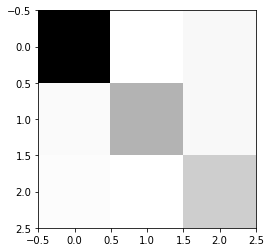

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,pred)
print(cm)
plt.imshow(cm, cmap='binary')

<Figure size 432x288 with 0 Axes>

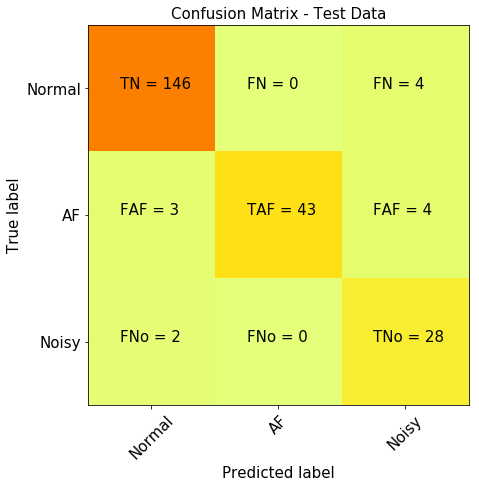

In [29]:
plt.clf()
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

plt.figure(num=None, figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Normal','AF','Noisy']
plt.title('Confusion Matrix - Test Data',fontsize=15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FN','FN'], ['FAF', 'TAF','FAF'],['FNo', 'FNo','TNo']]
for i in range(3):
    for j in range(3):
        plt.text(j-0.25,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=15)
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


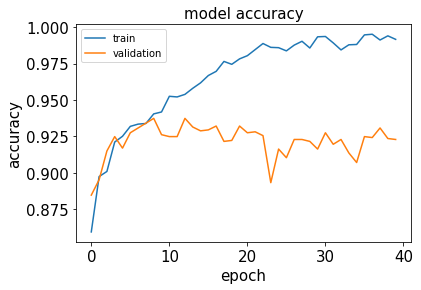

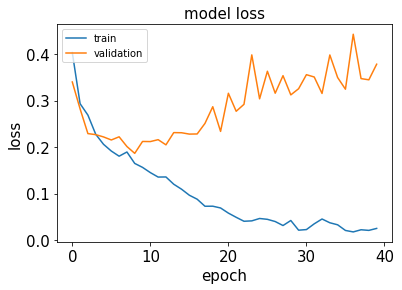

In [30]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss',fontsize=15)
plt.ylabel('loss',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
from sklearn import svm
from sklearn.model_selection import train_test_split

C = 1.0  
labels = pd.read_csv(os.path.join(label_path, 'labels.csv'), names=['file_name', 'label'])

#print(labels.head(5))
#print(labels['file_name'][0])
labels=labels.drop(labels[labels.file_name=='file_name'].index)
#print(labels)

labels_copy=labels
#print(labels_copy)
file_list=[]
for i in range(len(labels_copy['label'])):
    if (labels_copy['label'][i] == 'N') or (labels_copy['label'][i] == 'A') or (labels_copy['label'][i] == '~'):
        file_list.append(labels['file_name'][i])
    else:
        file = labels['file_name'][i]
        labels_copy=labels_copy.drop(labels[labels.file_name==file].index)

X=input_data2.ix[:,:]
y=np.ravel(labels_copy.label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#print(X_train.iloc[:200])

#model = svm.SVC(kernel='linear', C=C)
# LinearSVC (linear kernel)
#model = svm.LinearSVC(C=C)
# SVC with RBF kernel
#model = svm.SVC(kernel='rbf', gamma=0.6, C=0.6)
# SVC with polynomial (degree 3) kernel
model = svm.SVC(kernel='poly', degree=3, C=C)
model.fit(X_train.iloc[:5000], y_train[:5000])
model.score(X_train, y_train)
#Predict Output
#pred= model.predict(X_test)

0.9600351339481774

In [57]:
from sklearn.metrics import classification_report
pred= model.predict(X_test)
report = classification_report(y_true, pred)
print(report)

model.score(X_test, y_test)

0.8293807641633728

In [31]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for K in range(0,50):
 K_value= K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(X_train, y_train) 
 y_pred = neigh.predict(X_train)
 print("Accuracy is ", round((accuracy_score(y_train,y_pred)*100),2),"% validation ",(round((neigh.score(X_test, y_test)*100),2)),"% for K-Value:",K_value)
 

Accuracy is  100.0 % validation  84.72 % for K-Value: 1
Accuracy is  94.8 % validation  85.57 % for K-Value: 2
Accuracy is  88.58 % validation  85.24 % for K-Value: 3
Accuracy is  88.36 % validation  85.77 % for K-Value: 4
Accuracy is  86.96 % validation  85.38 % for K-Value: 5
Accuracy is  87.04 % validation  85.57 % for K-Value: 6
Accuracy is  86.54 % validation  85.31 % for K-Value: 7
Accuracy is  86.52 % validation  85.31 % for K-Value: 8
Accuracy is  86.41 % validation  85.18 % for K-Value: 9
Accuracy is  86.36 % validation  85.18 % for K-Value: 10
Accuracy is  86.36 % validation  85.11 % for K-Value: 11
Accuracy is  86.32 % validation  85.11 % for K-Value: 12
Accuracy is  86.34 % validation  85.11 % for K-Value: 13
Accuracy is  86.36 % validation  85.11 % for K-Value: 14
Accuracy is  86.3 % validation  85.05 % for K-Value: 15
Accuracy is  86.32 % validation  85.05 % for K-Value: 16
Accuracy is  86.23 % validation  85.05 % for K-Value: 17
Accuracy is  86.21 % validation  85.05 % f

In [7]:
import scipy.io as sio
from biosppy.signals import ecg
for file in file_list:
    signal = sio.loadmat(os.path.join(waveform_path, file))['val'][0].astype('float')
    # Get BioSPPy ECG object
    ecg_object = ecg.ecg(signal=signal , sampling_rate=300, show=False)
    x=ecg.hamilton_segmenter(signal=signal, sampling_rate=300)
    test = ecg.compare_segmentation(reference=ecg_object['rpeaks'], test=x['rpeaks'], sampling_rate=300)
print(x)

ReturnTuple(rpeaks=array([ 249,  546,  841, 1121, 1403, 1692, 1987, 2286, 2572, 2868, 3165,
       3460, 3741, 4028, 4316, 4603, 4875, 5147, 5426, 5712, 5994, 6259,
       6532, 6810, 7093, 7359, 7637, 7919, 8202, 8478, 8738]))


In [8]:
print(test)

ReturnTuple(TP=31, FP=0, performance=1.0, acc=1.0, err=0.0, match=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], deviation=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), mean_deviation=0.0, std_deviation=0.0, mean_ref_ibi=0.9432222222222222, std_ref_ibi=0.03376142727881831, mean_test_ibi=0.9432222222222222, std_test_ibi=0.03376142727881831)


In [54]:
input_data

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,162
0,215,218,237,243,231,239.0,244.0,242.0,233.0,241.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,306,301,305,318,305,315.0,321.0,308.0,109.0,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,233,223,233,232,236,237.0,224.0,215.0,213.0,217.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,286,277,323,358,309,342.0,403.0,253.0,215.0,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,295,183,124,96,117,166.0,132.0,112.0,300.0,186.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,220,249,255,275,297,311.0,315.0,306.0,305.0,313.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,312,305,300,300,301,293.0,285.0,286.0,291.0,302.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,145,139,204,175,212,173.0,261.0,216.0,159.0,194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,257,276,280,284,286,282.0,283.0,282.0,286.0,287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,258,256,260,263,255,262.0,235.0,281.0,258.0,249.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
